# Visualization of the results

This notebook visualizes the results and plots samples of reconstructed pointclouds.


In [12]:
import torch
import numpy as np 


import pyvista as pv 
pv.set_jupyter_backend("static")

In [13]:
pts = torch.load("../results/vae_airplane_latent/samples.pt").cpu().numpy()
pts.shape

(192, 2028, 3)

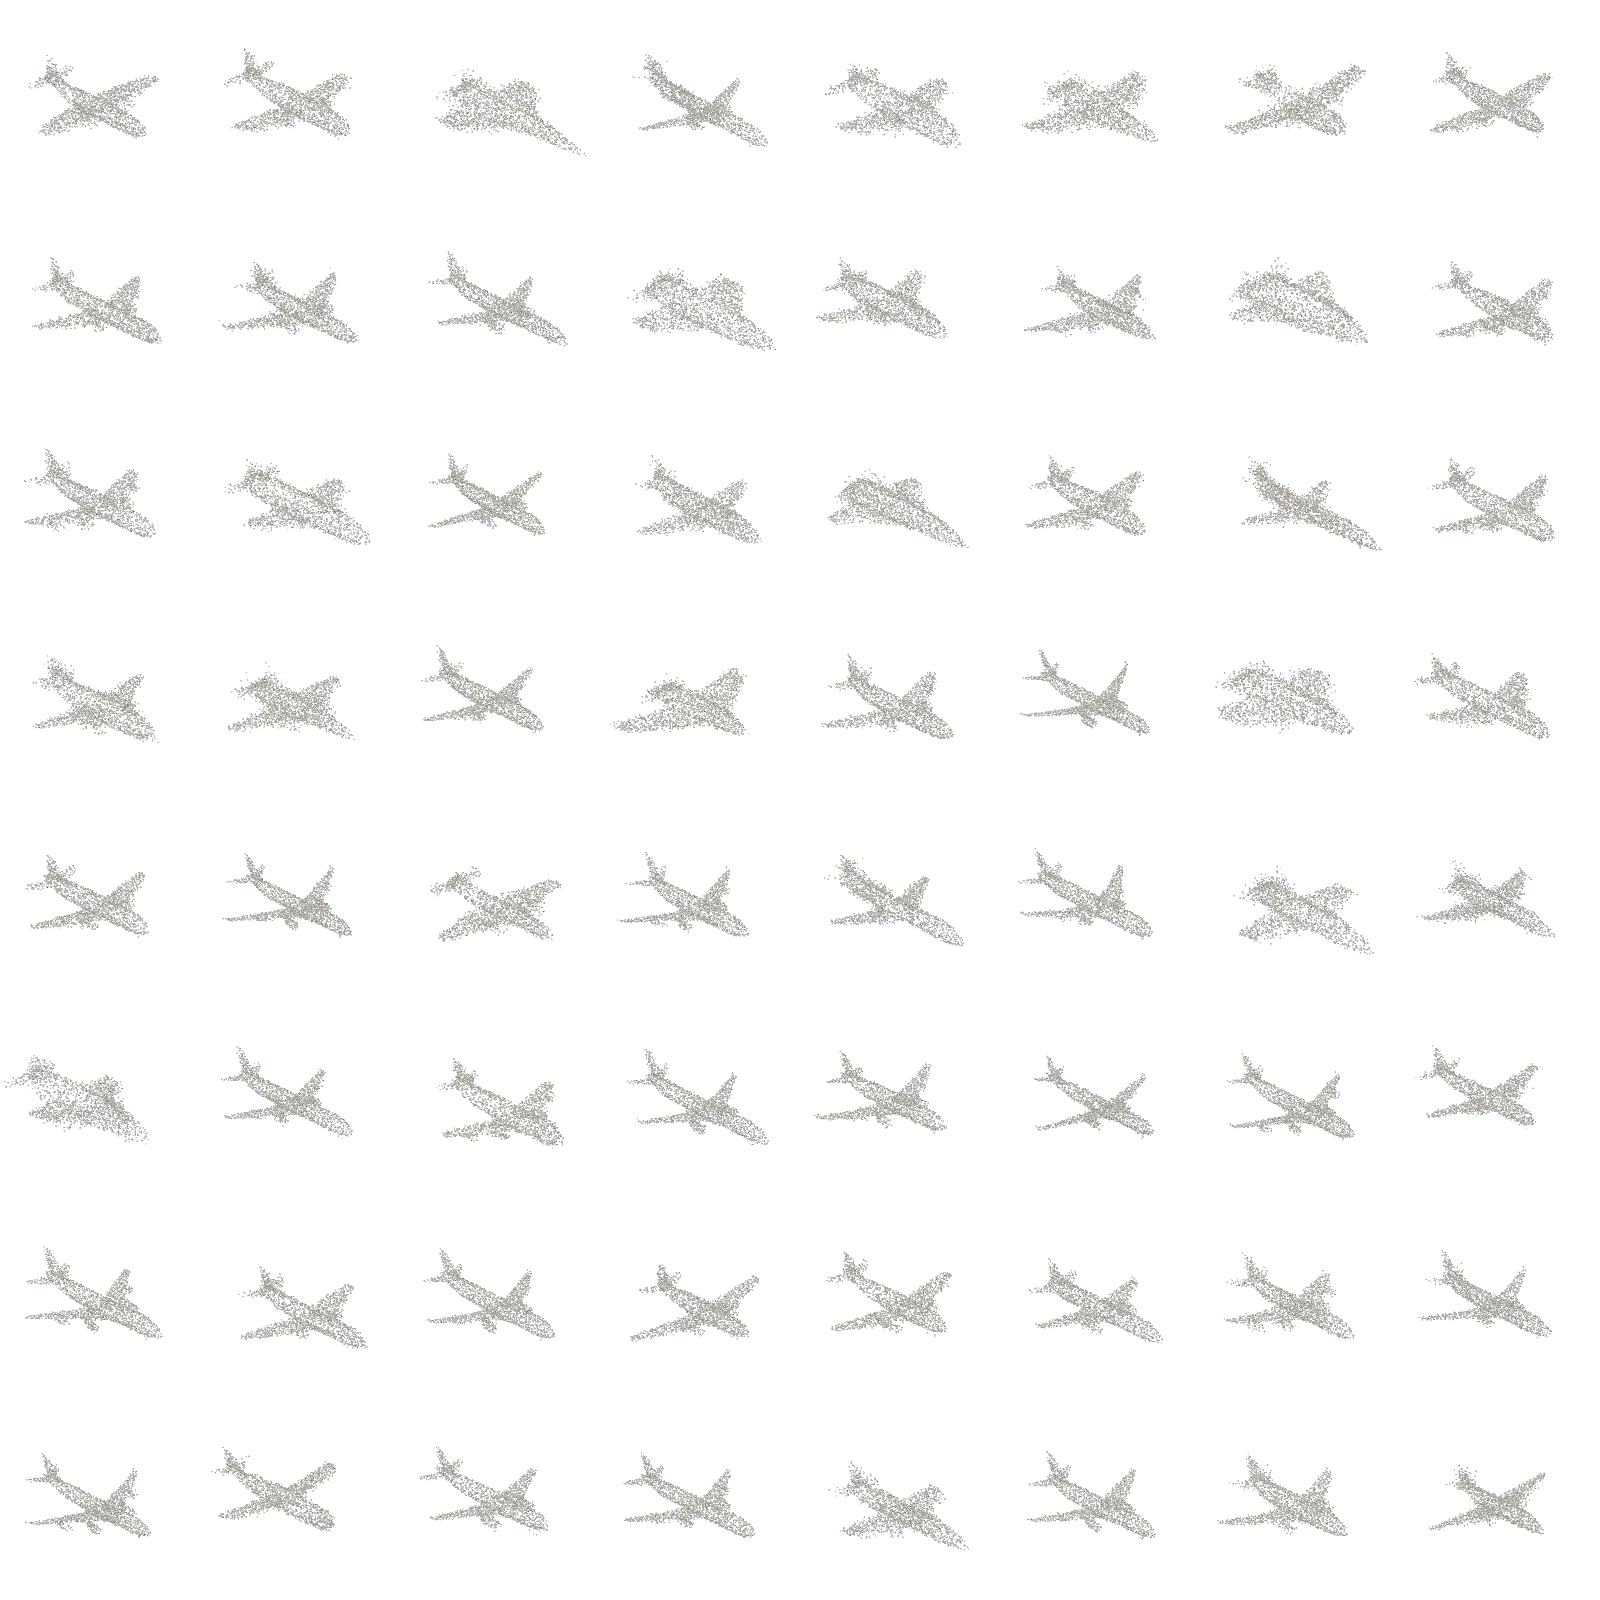

In [16]:

pl = pv.Plotter(
        shape=(8, 8),
        window_size=[1600, 1600],
        border=False,
        polygon_smoothing=True,
    )

for col in range(8):
    for row in range(8):
        # First plat
        pl.subplot(row, col)
        actor = pl.add_points(
            pts[col * 8 + row].reshape(-1, 3),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color="lightgray",
            point_size=2,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )
        
pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0], pos[1] + 3, pos[2])
pl.camera.position = (5, 0, 0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(
    position=(0, 0, 0), positional=True, cone_angle=50, exponent=20, intensity=0.2
)
pl.add_light(light)
pl.camera.zoom(3.)
pl.show()


torch.Size([64, 3, 256, 256])
torch.Size([2066, 2066])


(-0.5, 2065.5, 2065.5, -0.5)

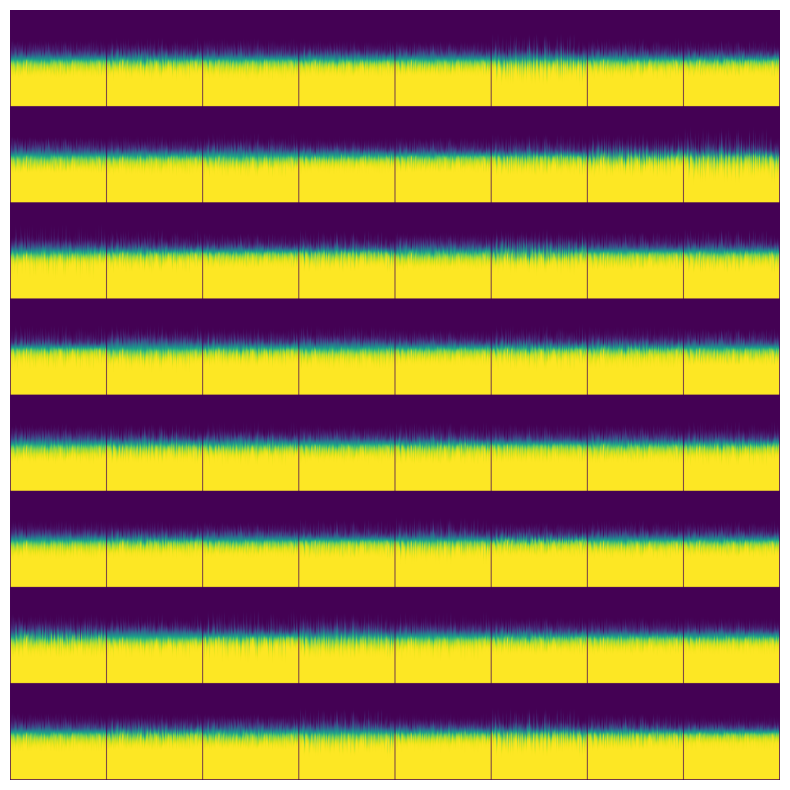

In [ ]:

from matplotlib import axis
import matplotlib.pyplot as plt
from numpy import gradient
import torchvision

ects = torch.load("../results/vae_airplane_latent/sample_ect.pt")[:64].unsqueeze(1).repeat(1,3,1,1).cpu()
print(ects.shape)
grid_img = torchvision.utils.make_grid(ects, nrow=8)[0]
print(grid_img.shape)

fig = plt.figure(figsize=(10,10))
plt.imshow(grid_img.numpy(),cmap='viridis')
plt.axis("off")


In [ ]:
pv.set_jupyter_backend("server")

pl = pv.Plotter(
        shape=(8, 8),
        window_size=[1600, 1600],
        border=False,
        polygon_smoothing=True,
    )

for col in range(8):
    for row in range(8):
        # First plat
        pl.subplot(row, col)
        actor = pl.add_points(
            sample_pcs[col * 8 + row].cpu().numpy().reshape(-1, 3),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color="lightgray",
            point_size=2,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )
        # actor = pl.add_points(
        #     ref_pcs[col * 8 + row].cpu().numpy().reshape(-1, 3),
        #     style="points",
        #     emissive=False,
        #     show_scalar_bar=False,
        #     render_points_as_spheres=True,
        #     color="red",
        #     point_size=2,
        #     ambient=0.2,
        #     diffuse=0.8,
        #     specular=0.8,
        #     specular_power=40,
        #     smooth_shading=True,
        # )
        
pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0], pos[1] + 3, pos[2])
pl.camera.position = (10, 0, 0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(
    position=(0, 0, 0), positional=True, cone_angle=50, exponent=20, intensity=0.2
)
pl.add_light(light)
pl.camera.zoom(0.7)
pl.show()

Widget(value='<iframe src="http://localhost:46639/index.html?ui=P_0x7efd690650c0_3&reconnect=auto" class="pyvi…

In [ ]:

results = compute_all_metrics(sample_pcs, ref_pcs, 100, accelerated_cd=True)
results = {
    k: (v.cpu().detach().item() if not isinstance(v, float) else v)
    for k, v in results.items()
}

print(results["1-NN-CD-acc"])
print(results["1-NN-EMD-acc"])
# print(results)

100%|██████████| 405/405 [05:10<00:00,  1.31it/s]

0.8827160596847534
0.5901234745979309


In [ ]:
print(sample_pcs.shape)

torch.Size([405, 2028, 3])


In [ ]:
pts = 7* torch.load("./results/customvae/test_airplane.pt").view(-1,2048,3).cpu().numpy()

pl = pv.Plotter(
        shape=(8, 8),
        window_size=[1600, 1600],
        border=False,
        polygon_smoothing=True,
    )

for col in range(8):
    for row in range(8):
        # First plat
        pl.subplot(row, col)
        actor = pl.add_points(
            pts[col * 8 + row].reshape(-1, 3),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color="lightgray",
            point_size=2,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )
        
pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0], pos[1] + 3, pos[2])
pl.camera.position = (10, 0, 0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(
    position=(0, 0, 0), positional=True, cone_angle=50, exponent=20, intensity=0.2
)
pl.add_light(light)
pl.camera.zoom(0.7)
pl.show()

Widget(value='<iframe src="http://localhost:46639/index.html?ui=P_0x7efd69067670_2&reconnect=auto" class="pyvi…

In [ ]:
pts = 7 * torch.tensor(np.load("./results/canonicalvae/0_gen.npy")).cpu().numpy()
print(pts.shape)


sample_pcs = pts * s.cpu().numpy() + m.cpu().numpy()


pl = pv.Plotter(
        shape=(8, 8),
        window_size=[1600, 1600],
        border=False,
        polygon_smoothing=True,
    )

for col in range(8):
    for row in range(8):
        # First plat
        pl.subplot(row, col)
        actor = pl.add_points(
            pts[col * 8 + row].reshape(-1, 3),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color="lightgray",
            point_size=2,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )
        actor = pl.add_points(
            ref_pcs[col * 8 + row].cpu().numpy().reshape(-1, 3),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color="red",
            point_size=2,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )
        
pl.background_color = "w"
pl.link_views()
pl.camera_position = "xy"
pos = pl.camera.position
pl.camera.position = (pos[0], pos[1] + 3, pos[2])
pl.camera.position = (10, 0, 0)
pl.camera.azimuth = 45
pl.camera.elevation = 30
# create a top down light
light = pv.Light(
    position=(0, 0, 0), positional=True, cone_angle=50, exponent=20, intensity=0.2
)
pl.add_light(light)
pl.camera.zoom(0.7)
pl.show()

(405, 2048, 3)


Widget(value='<iframe src="http://localhost:36495/index.html?ui=P_0x7f17678b8310_11&reconnect=auto" class="pyv…

In [ ]:
from pprint import pprint


results = compute_all_metrics(torch.tensor(sample_pcs).cuda(), ref_pcs, 8, accelerated_cd=True)
results = {
    k: (v.cpu().detach().item() if not isinstance(v, float) else v)
    for k, v in results.items()
}

pprint(results)

100%|██████████| 405/405 [10:15<00:00,  1.52s/it]

{'1-NN-CD-acc': 1.0,
 '1-NN-CD-acc_f': 1.0,
 '1-NN-CD-acc_t': 1.0,
 '1-NN-EMD-acc': 1.0,
 '1-NN-EMD-acc_f': 1.0,
 '1-NN-EMD-acc_t': 1.0,
 'lgan_cov-CD': 0.14320987462997437,
 'lgan_cov-EMD': 0.054320987313985825,
 'lgan_mmd-CD': 0.007722377311438322,
 'lgan_mmd-EMD': 0.042898230254650116,
 'lgan_mmd_smp-CD': 0.017370790243148804,
 'lgan_mmd_smp-EMD': 0.06765114516019821}


In [ ]:
pv.set_jupyter_backend("trame")
pv.plot(pts[63],render_points_as_spheres=True)

Widget(value='<iframe src="http://localhost:36495/index.html?ui=P_0x7f18500c6560_4&reconnect=auto" class="pyvi…

In [ ]:
def plot_recon_3d(recon_pcs, ref_pcs, num_pc=5, offset=0,size=5):

    pl = pv.Plotter(
        shape=(3, num_pc),
        window_size=[200 * num_pc, 600],
        border=False,
        polygon_smoothing=True,
    )

    for col in range(num_pc):
        # First plat
        pl.subplot(0, col)
        actor = pl.add_points(
            recon_pcs[col + offset].reshape(-1, 3),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color="lightgray",
            point_size=size,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )
        pl.subplot(1, col)
        actor = pl.add_points(
            ref_pcs[col + offset].reshape(-1, 3),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color=LIGHTRED,
            point_size=size,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )
        actor = pl.add_points(
            recon_pcs[col + offset].reshape(-1, 3),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color="lightgray",
            point_size=size,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )

        pl.subplot(2, col)
        actor = pl.add_points(
            ref_pcs[col + offset].reshape(-1, 3),
            style="points",
            emissive=False,
            show_scalar_bar=False,
            render_points_as_spheres=True,
            color=LIGHTRED,
            point_size=size,
            ambient=0.2,
            diffuse=0.8,
            specular=0.8,
            specular_power=40,
            smooth_shading=True,
        )

    pl.background_color = "w"
    pl.link_views()
    pl.camera_position = "xy"
    pos = pl.camera.position
    pl.camera.position = (pos[0], pos[1] + 3, pos[2])
    pl.camera.position = (10, 0, 0)
    pl.camera.azimuth = 45
    pl.camera.elevation = 30
    # create a top down light
    light = pv.Light(
        position=(0, 0, 0), positional=True, cone_angle=50, exponent=20, intensity=0.2
    )
    pl.add_light(light)
    pl.camera.zoom(0.7)
    pl.show()

In [ ]:
def model_to_cate(model):
    name = model.split("_")[-1]
    return name.title()


def model_to_modelname(model):
    name_list = model.split("_")[:-1]
    name = " ".join(name_list)
    return name.title()

def model_to_modelname_rendered(model):
    name_list = model.split("_")[:-4]
    name = " ".join(name_list)
    return name.title()


def visualize_2d_model(model,num_pc=5):
    recon_pcs = torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs[:num_pc],ref_pcs=reference_pcs[:num_pc],num_pc=num_pc)

def visualize_2d_genmodel(model,num_pc=5):
    recon_pcs = torch.load(f'./results/{model}/samples.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs[:num_pc],ref_pcs=reference_pcs[:num_pc],num_pc=num_pc)


def visualize_3d_model(model,scale=1.0,num_pc:int=5):
    recon_pcs = scale*torch.load(f'./results/{model}/reconstructions.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)

def visualize_3d_genmodel(model,scale=1.0,num_pc:int=5,offset:int=0):
    recon_pcs = scale*torch.load(f'./results/{model}/samples.pt').cpu().detach().squeeze().numpy()
    reference_pcs = scale*torch.load(f'./results/{model}/references.pt').cpu().detach().squeeze().numpy()
    plot_recon_3d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc,offset=offset)


def visualize_2d_rendered(folder,ectsize,num_pc=5):
    recon_pcs = torch.load(f'./results/{folder}/reconstructions_{ectsize}.pt').cpu().detach().squeeze().numpy()
    reference_pcs = torch.load(f'./results/{folder}/references_{ectsize}.pt').cpu().detach().squeeze().numpy()
    plot_recon_2d(recon_pcs=recon_pcs,ref_pcs=reference_pcs,num_pc=num_pc)

In [ ]:
CATE = "airplane"

In [ ]:
recon_ect = torch.load("./results/vae_airplane/reconstructed_ect.pt").movedim(-1,-2).cpu().numpy()
recon_ect_diff = np.diff(recon_ect, n=1, axis=2)

ect = (1+torch.load("./results/vae_airplane/ect.pt").squeeze().movedim(-1,-2).cpu().numpy())/2
ect_diff = np.diff(ect,n=1, axis=2)

recons = torch.load("./results/vae_airplane/reconstructions.pt")
refs = torch.load("./results/vae_airplane/references.pt")

In [ ]:
print(recon_ect.min())
print(ect.min())


0.0
0.5


In [ ]:
# Compute EMD and CD 
res = EMD_CD(recons,refs,batch_size=8,accelerated_cd=True,reduced=False)

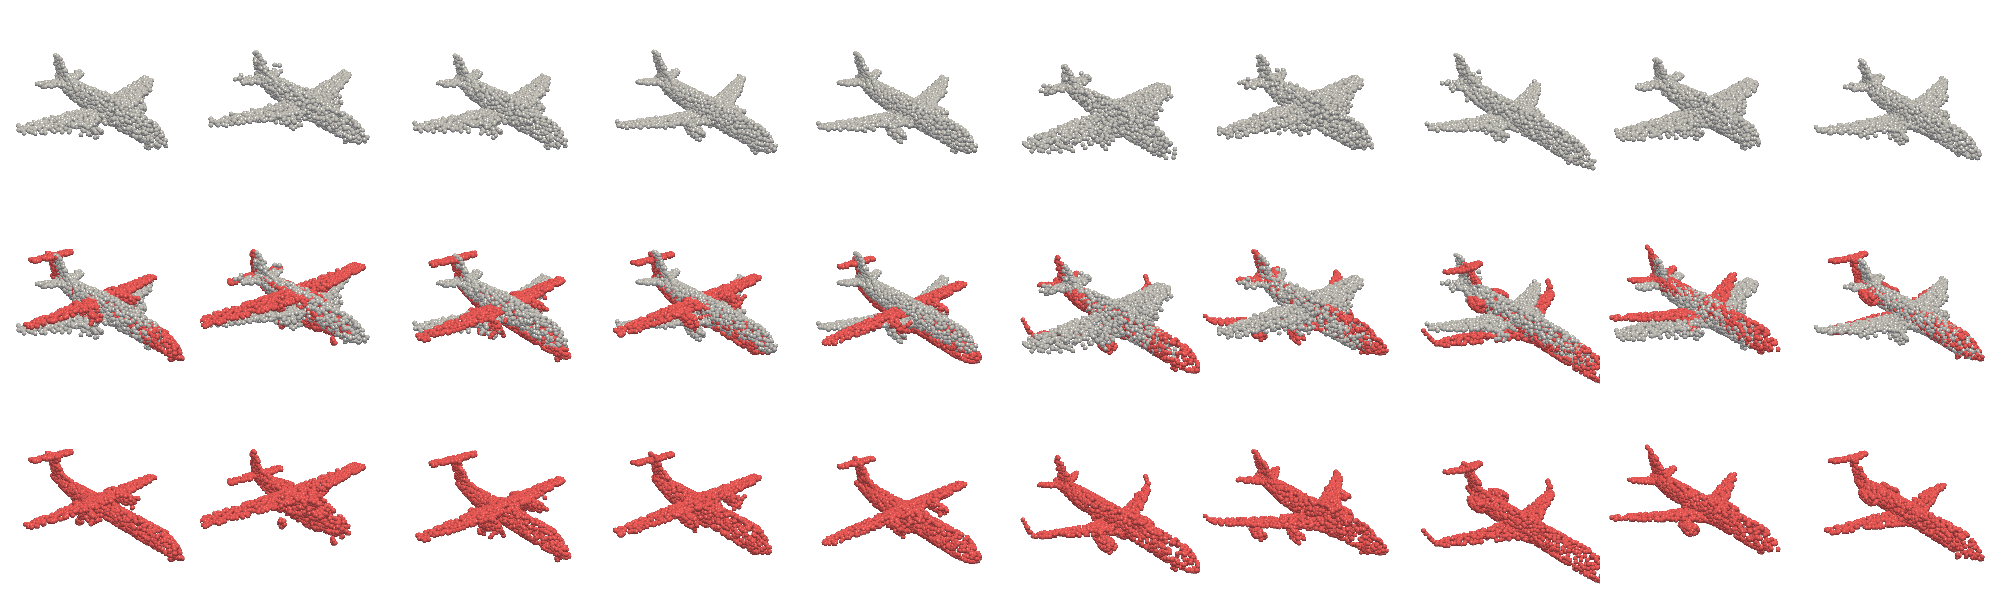

In [ ]:
import pyvista as pv 
pv.set_jupyter_backend("static")

_, idxs = torch.topk(res["MMD-CD"],k=50,largest=True)
idxs = idxs.cpu()
scale = 10
plot_recon_3d(scale*recons[idxs].cpu().numpy(),scale * refs[idxs].cpu().numpy(),num_pc=10,offset=20)

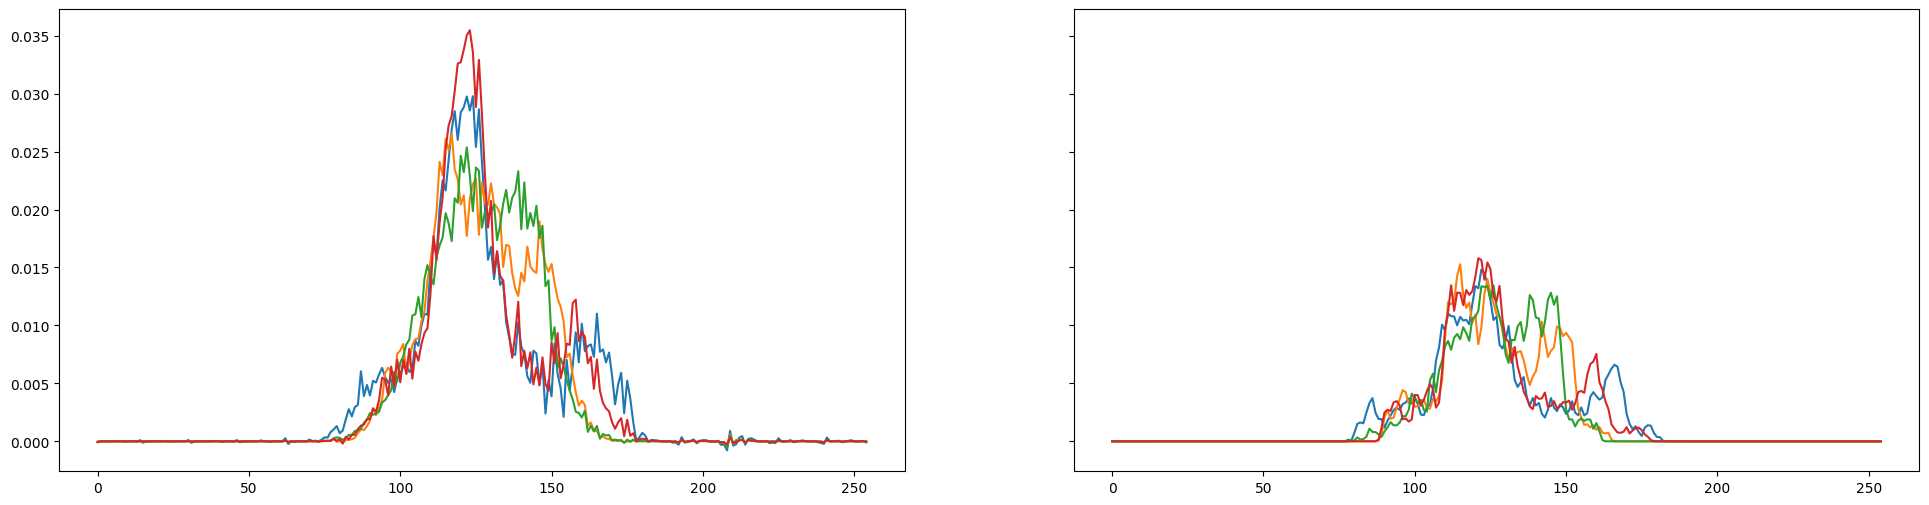

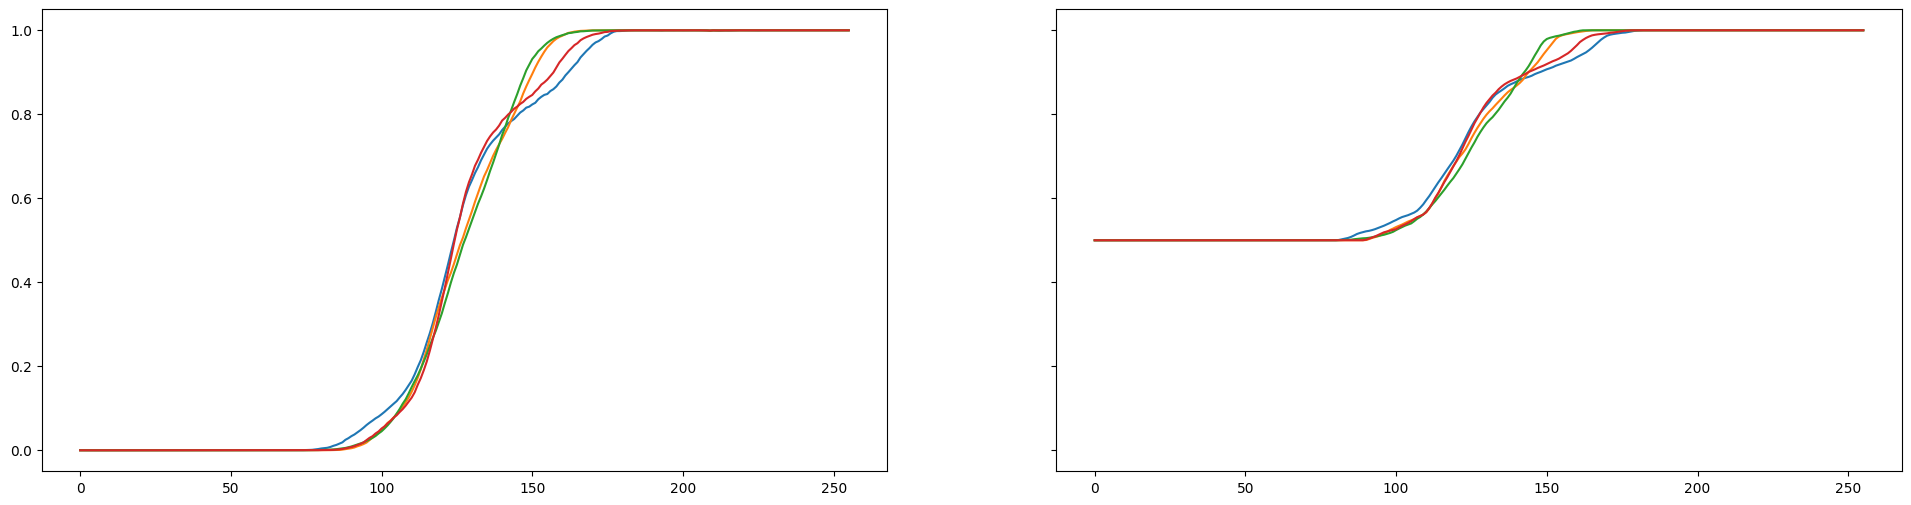

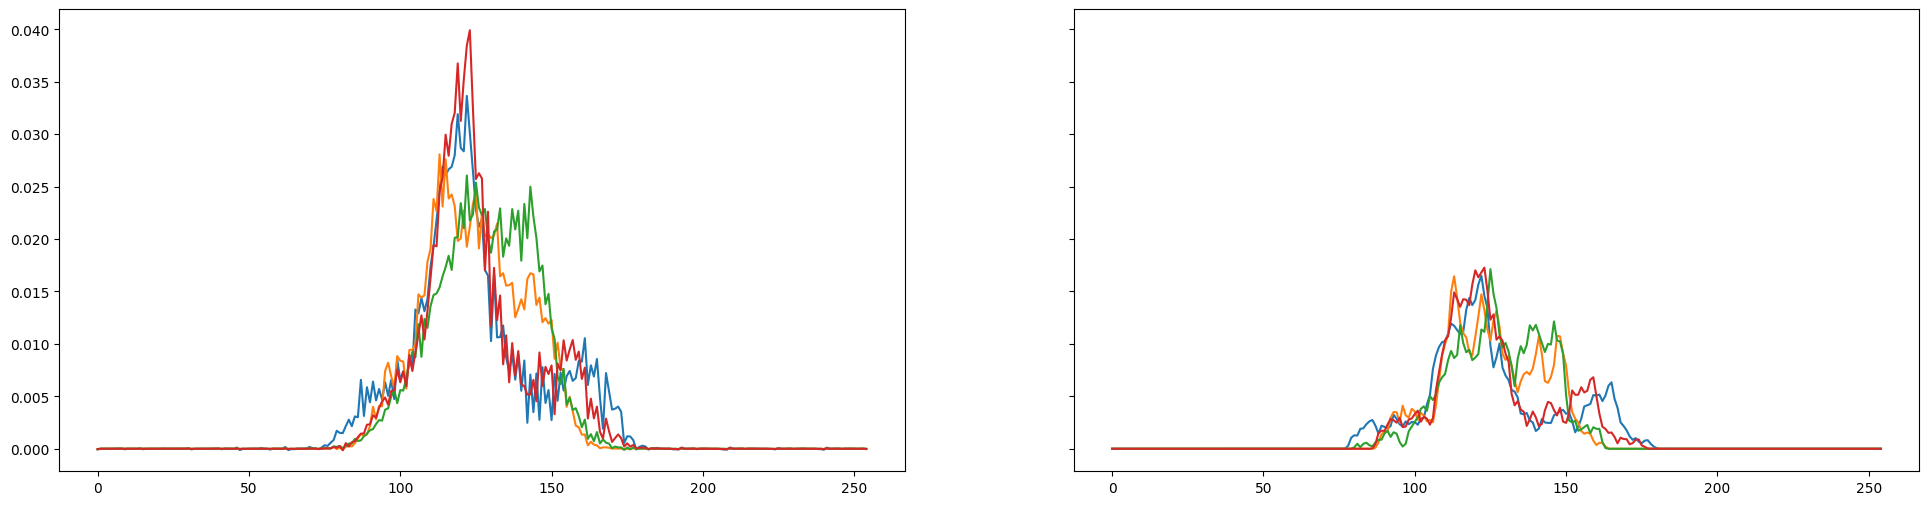

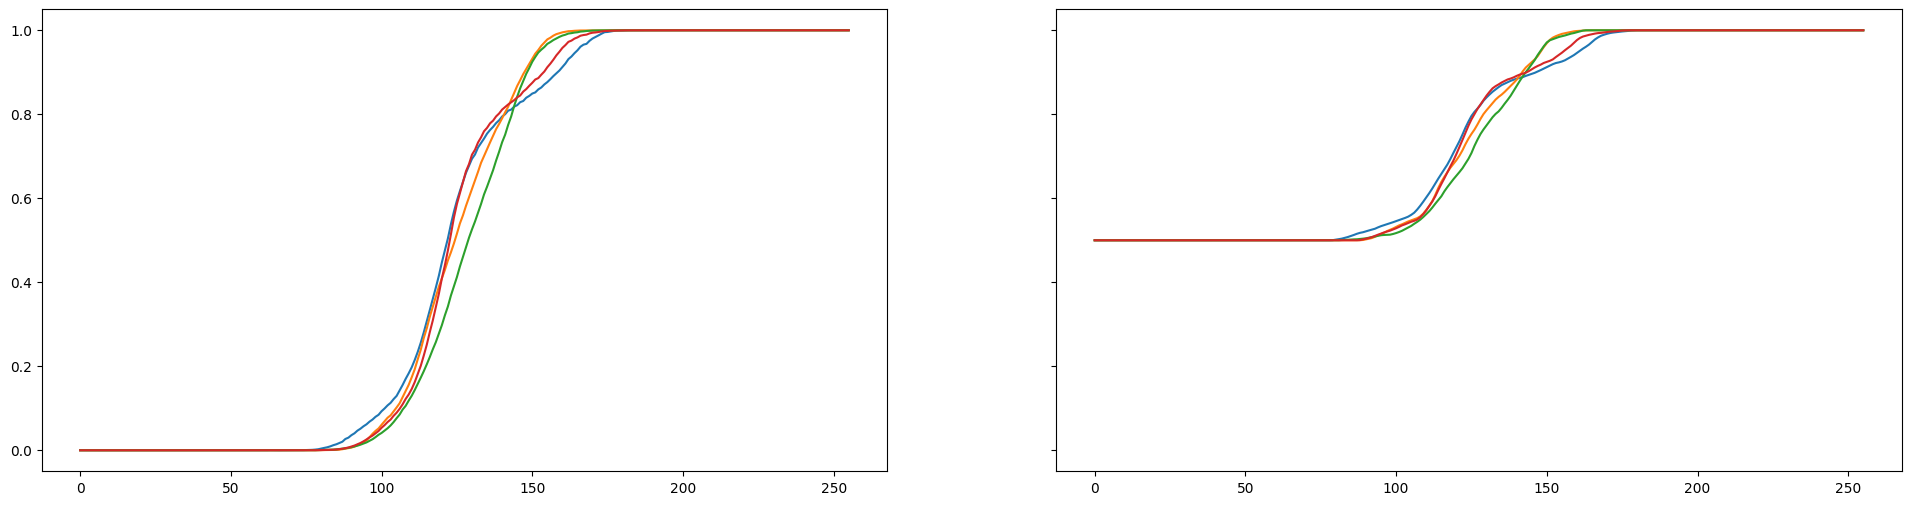

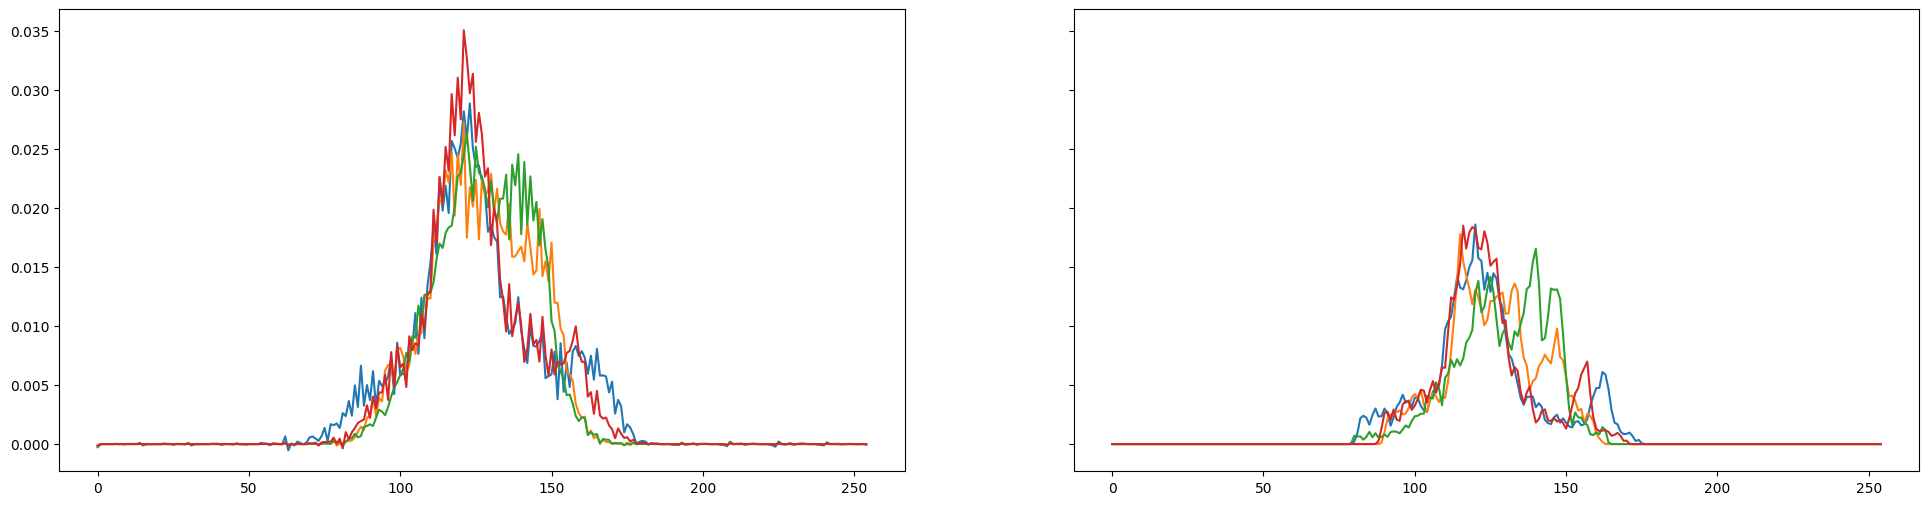

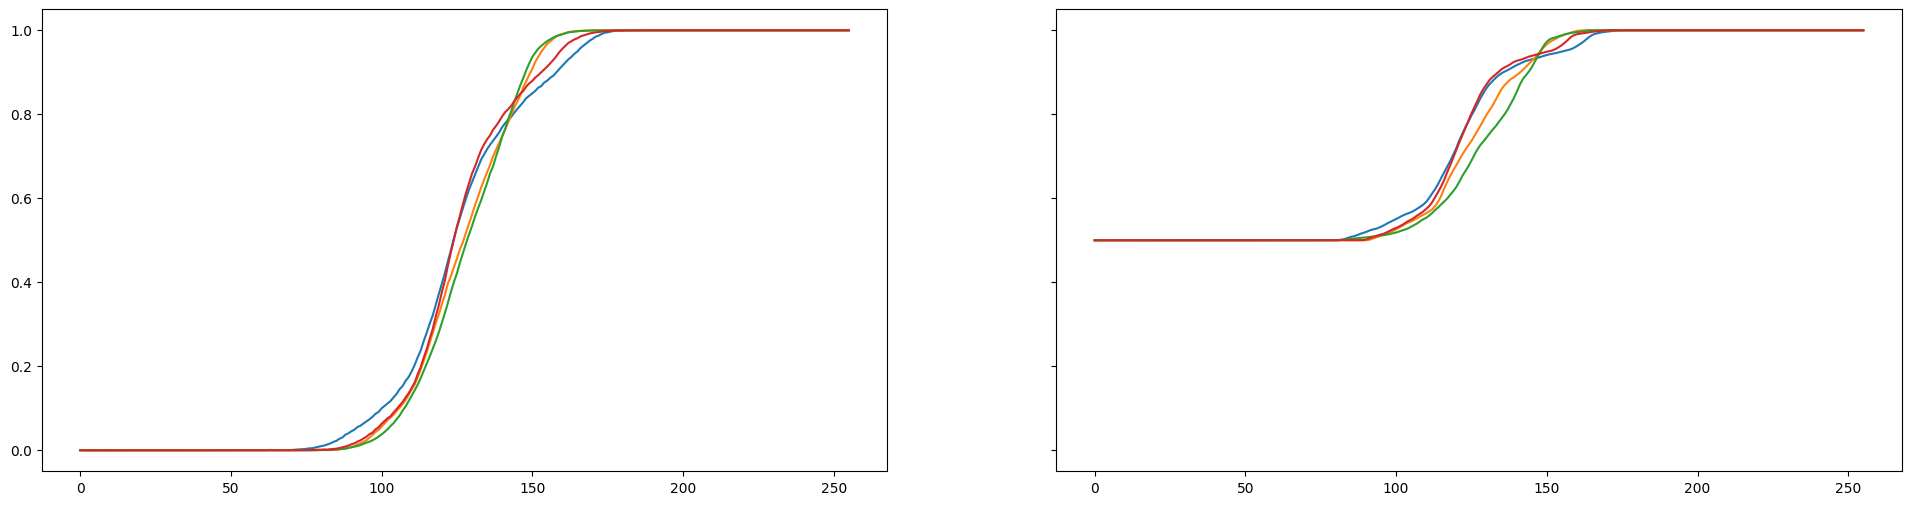

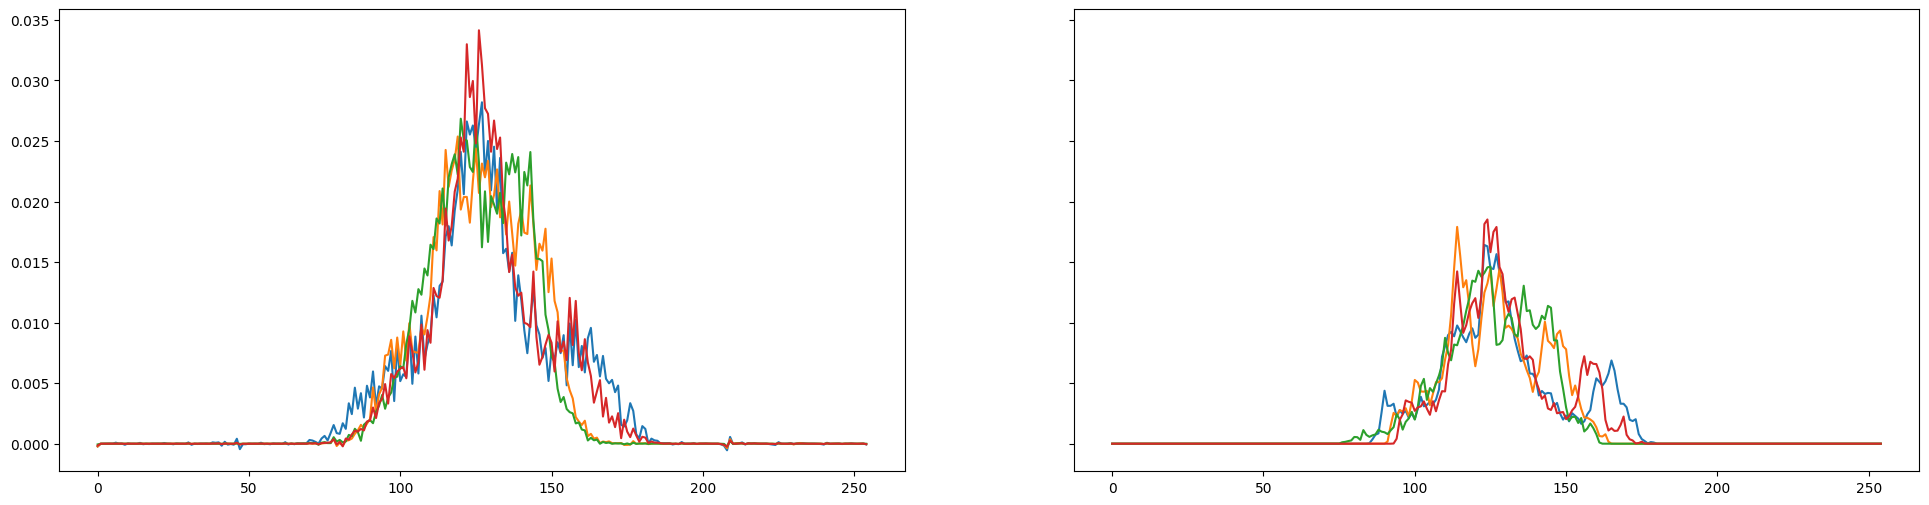

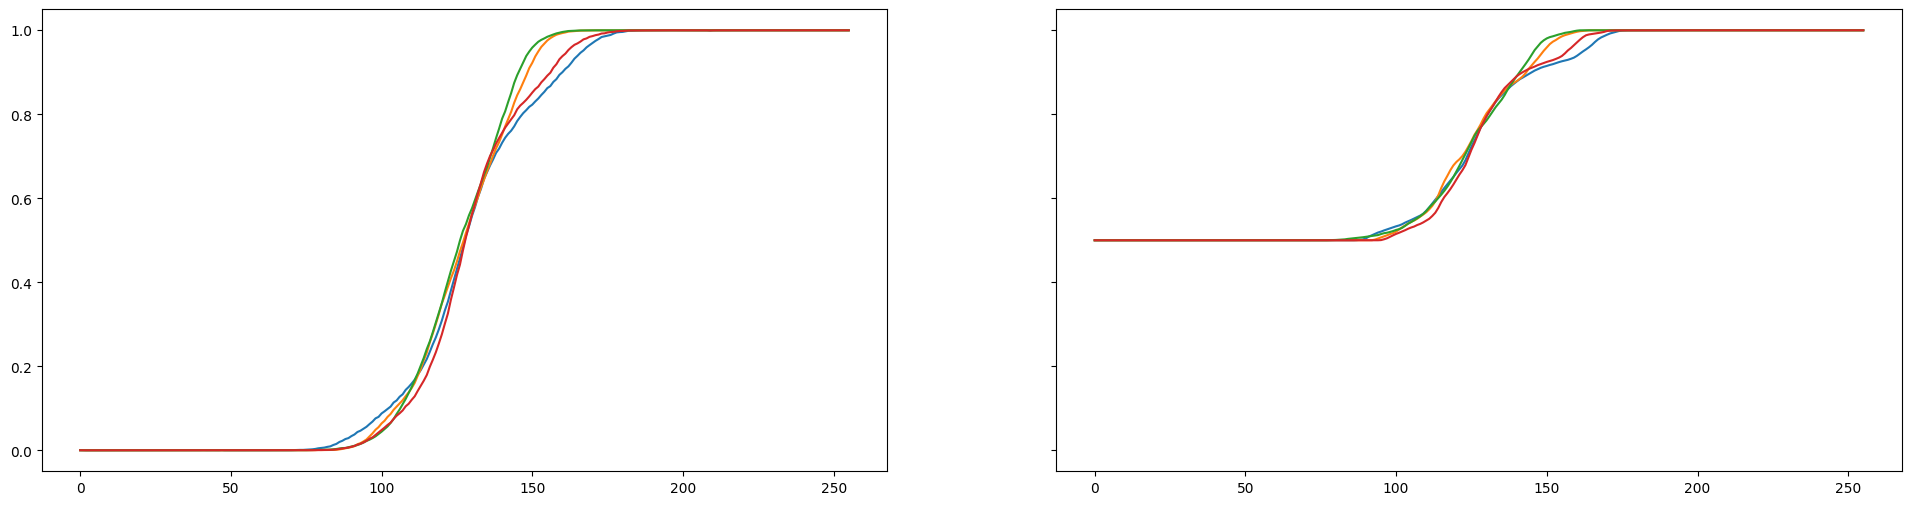

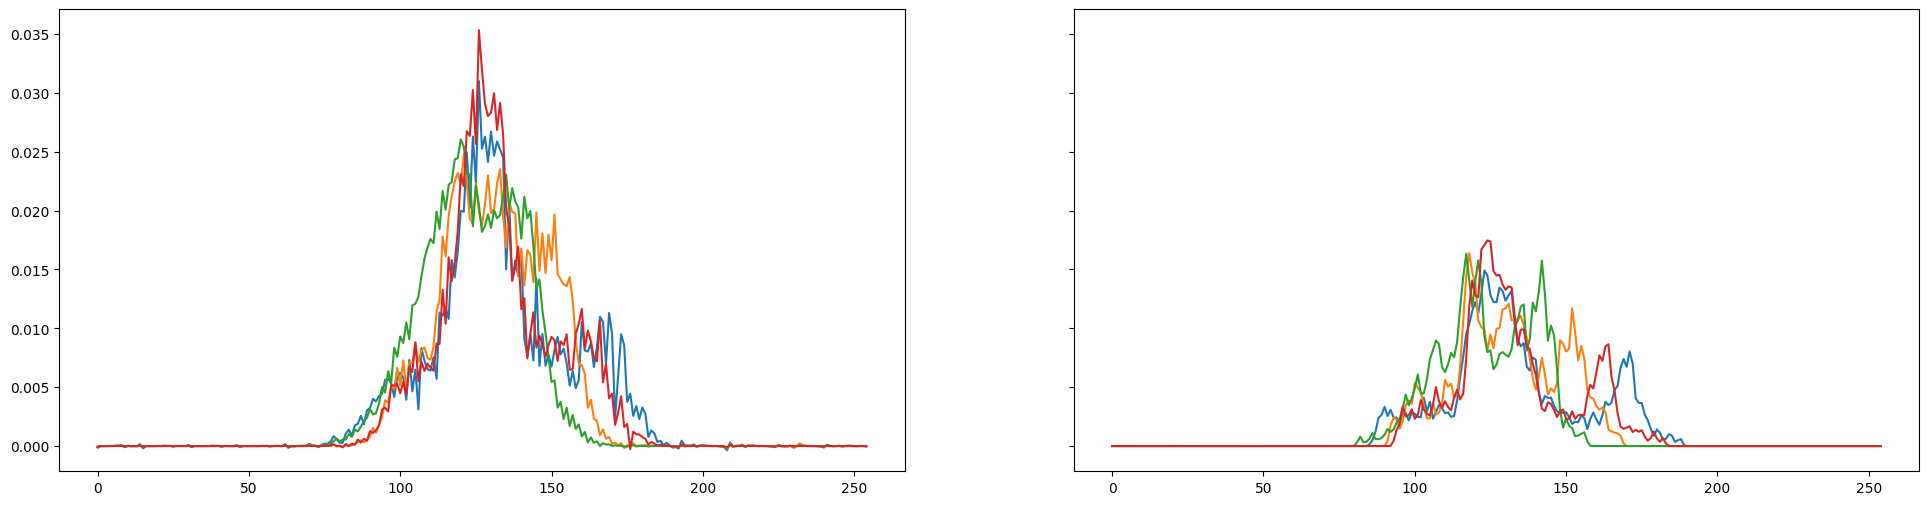

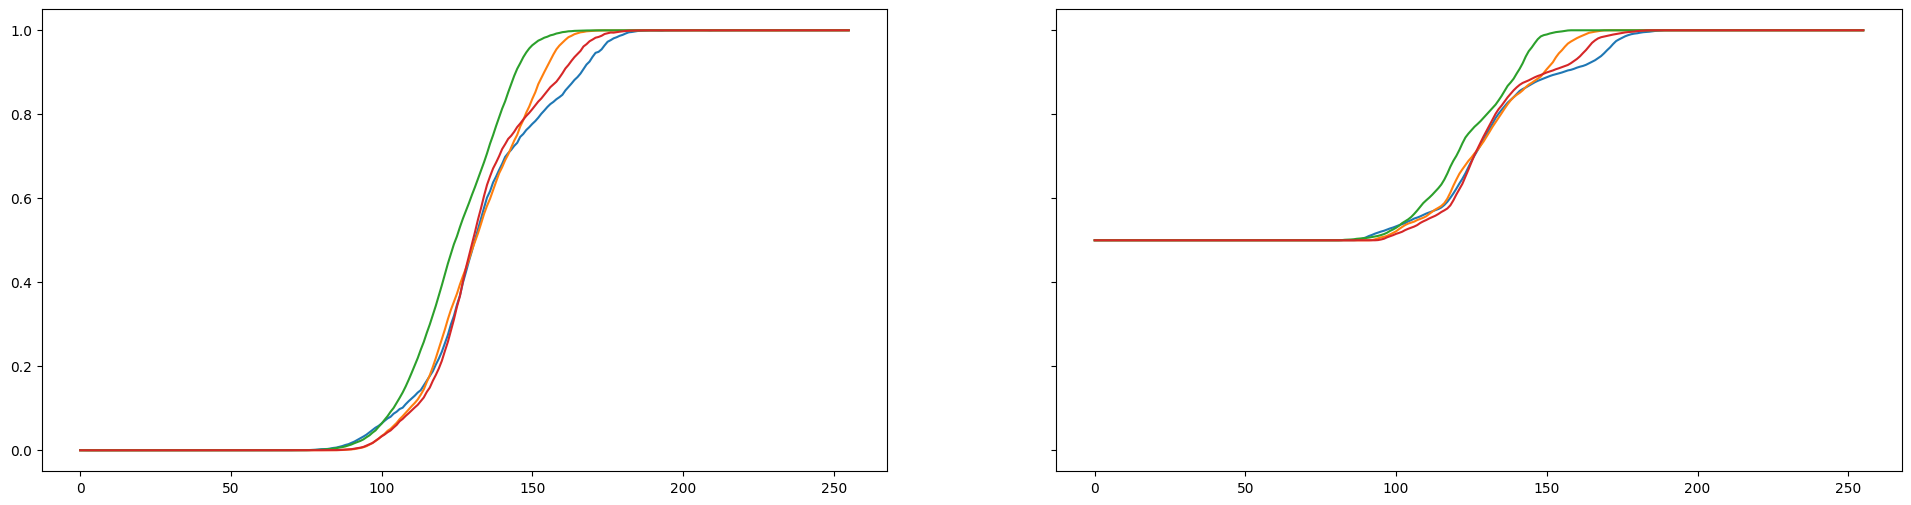

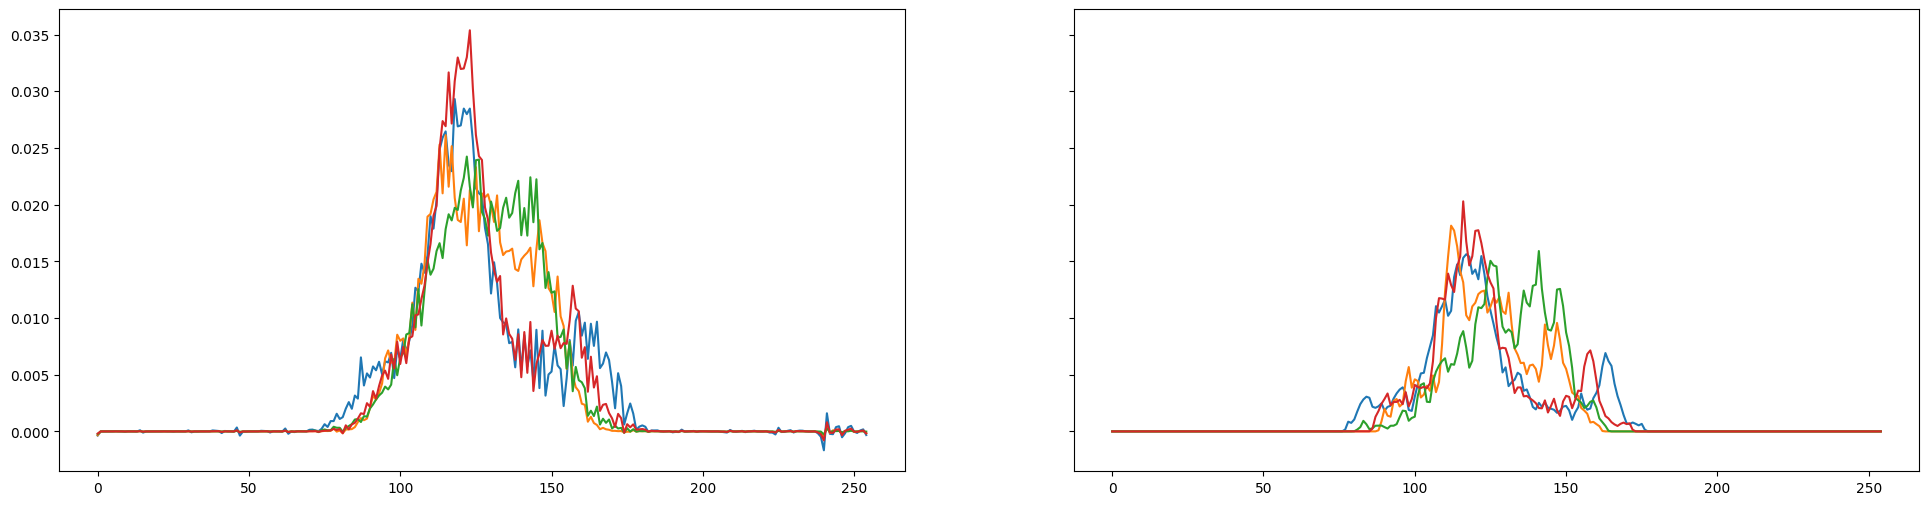

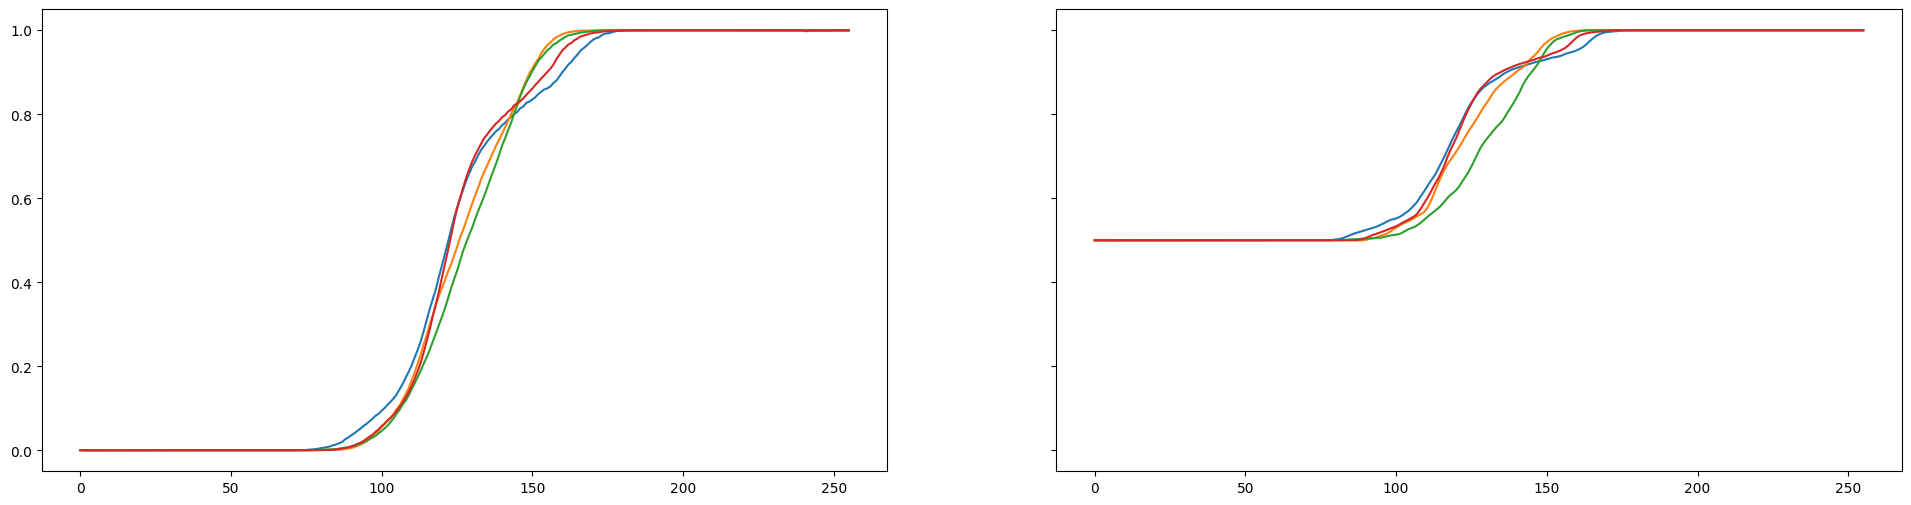

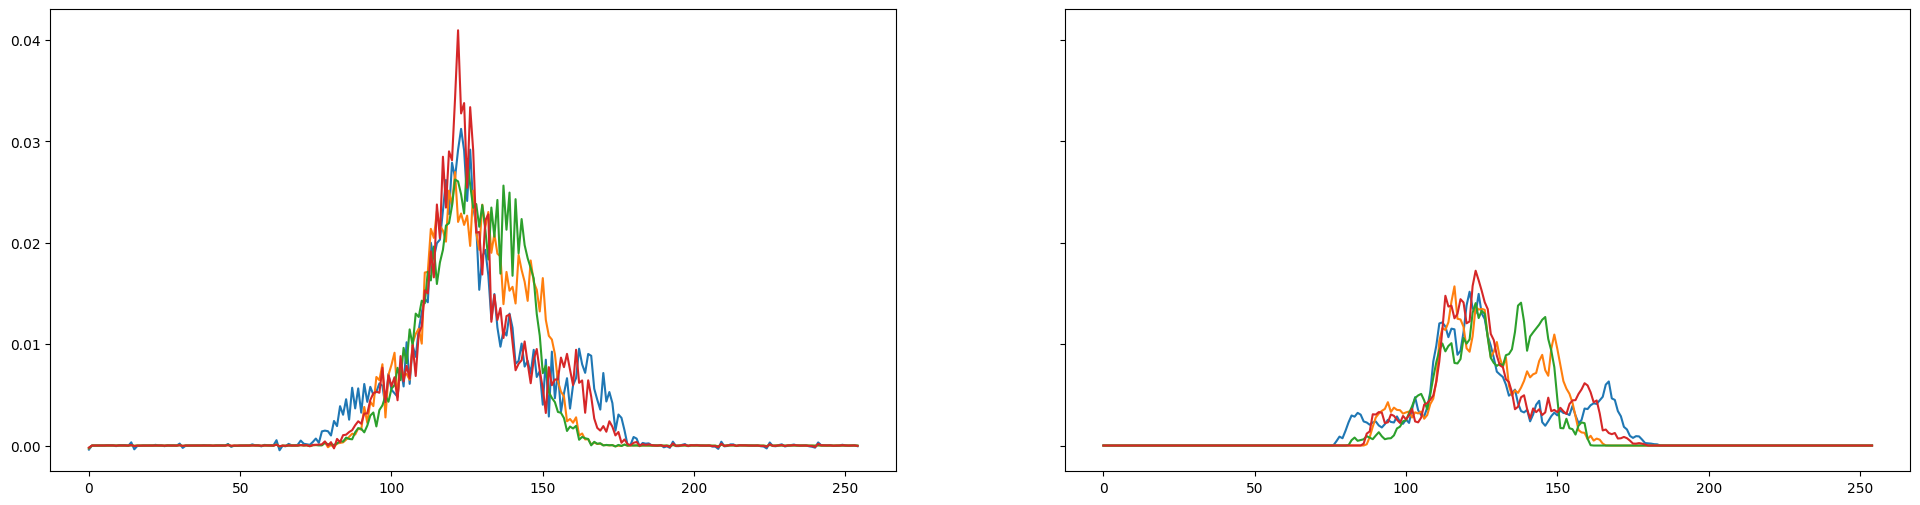

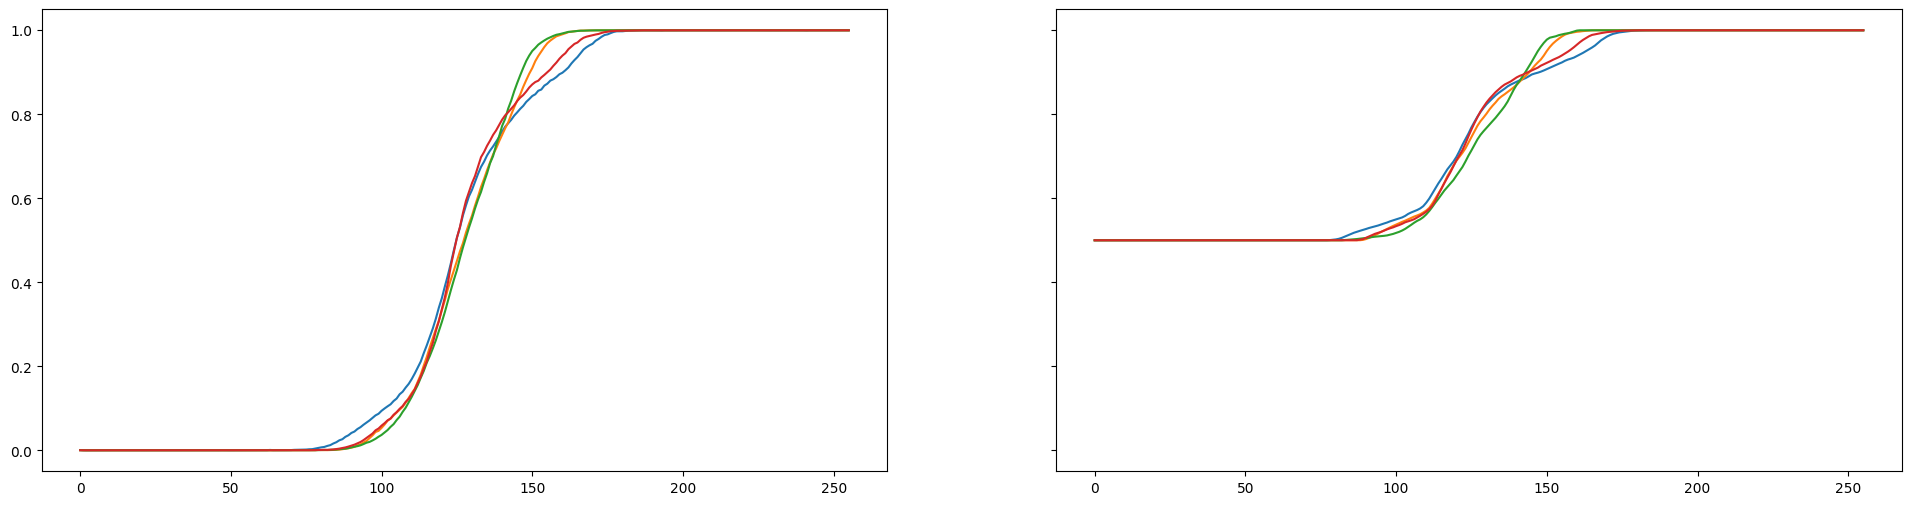

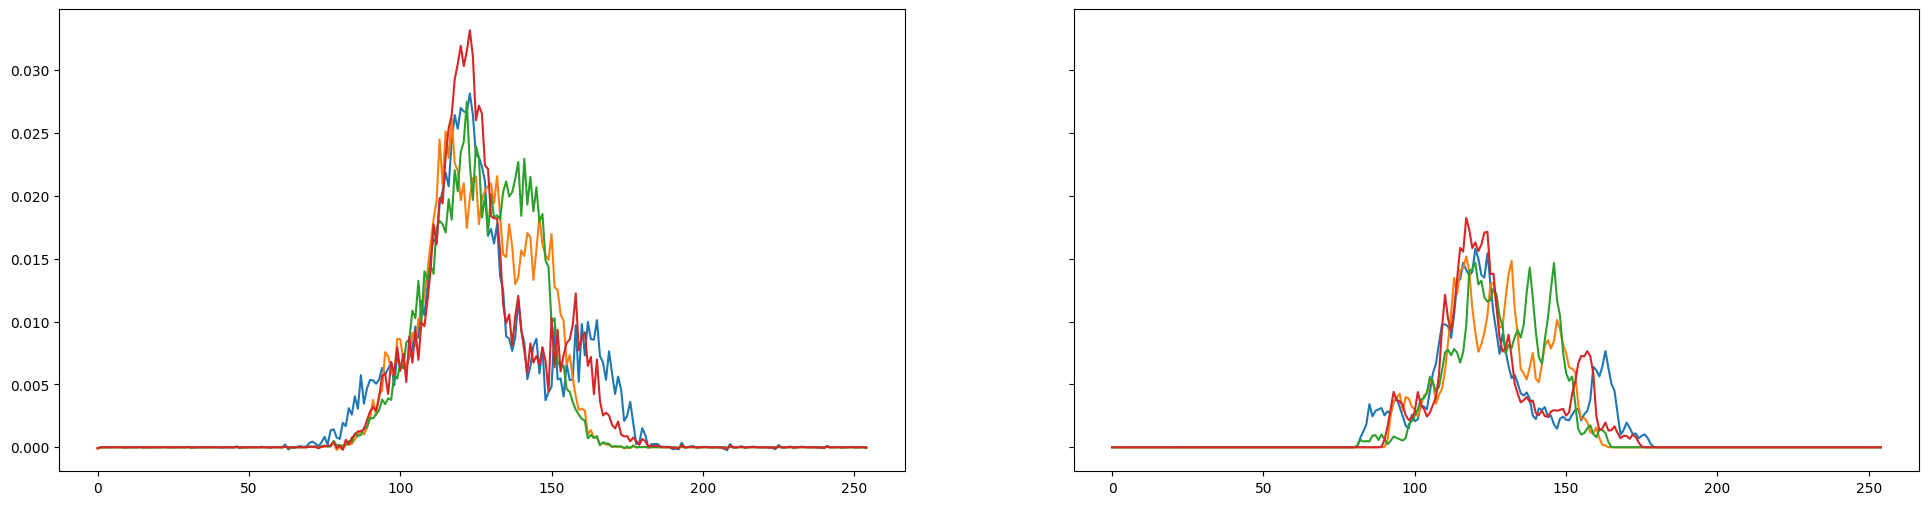

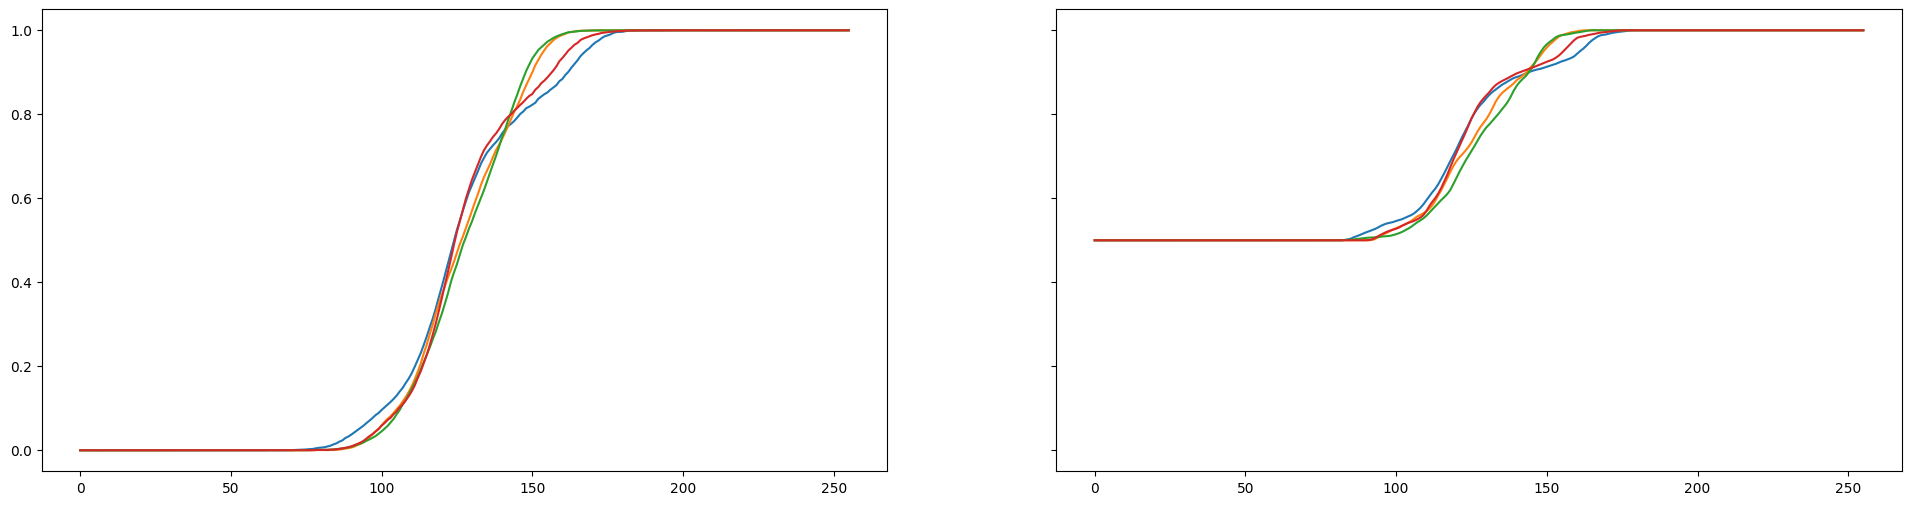

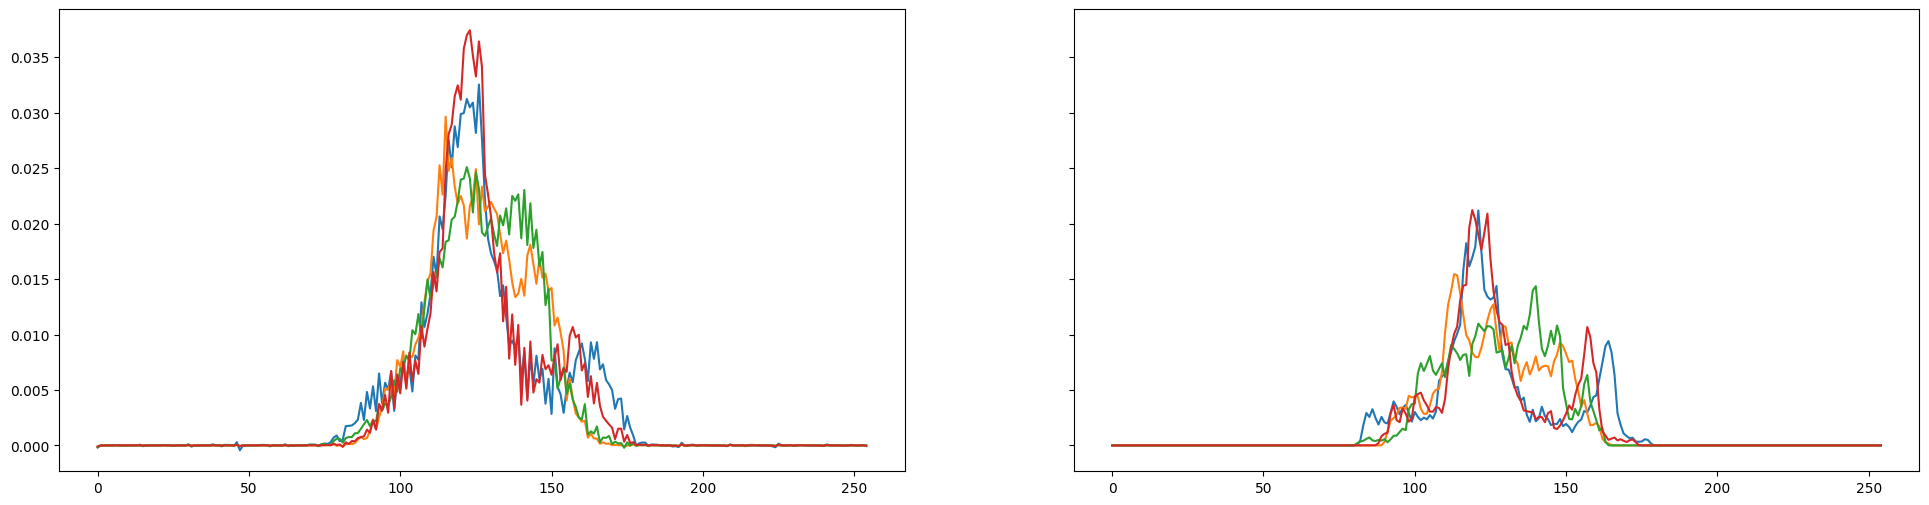

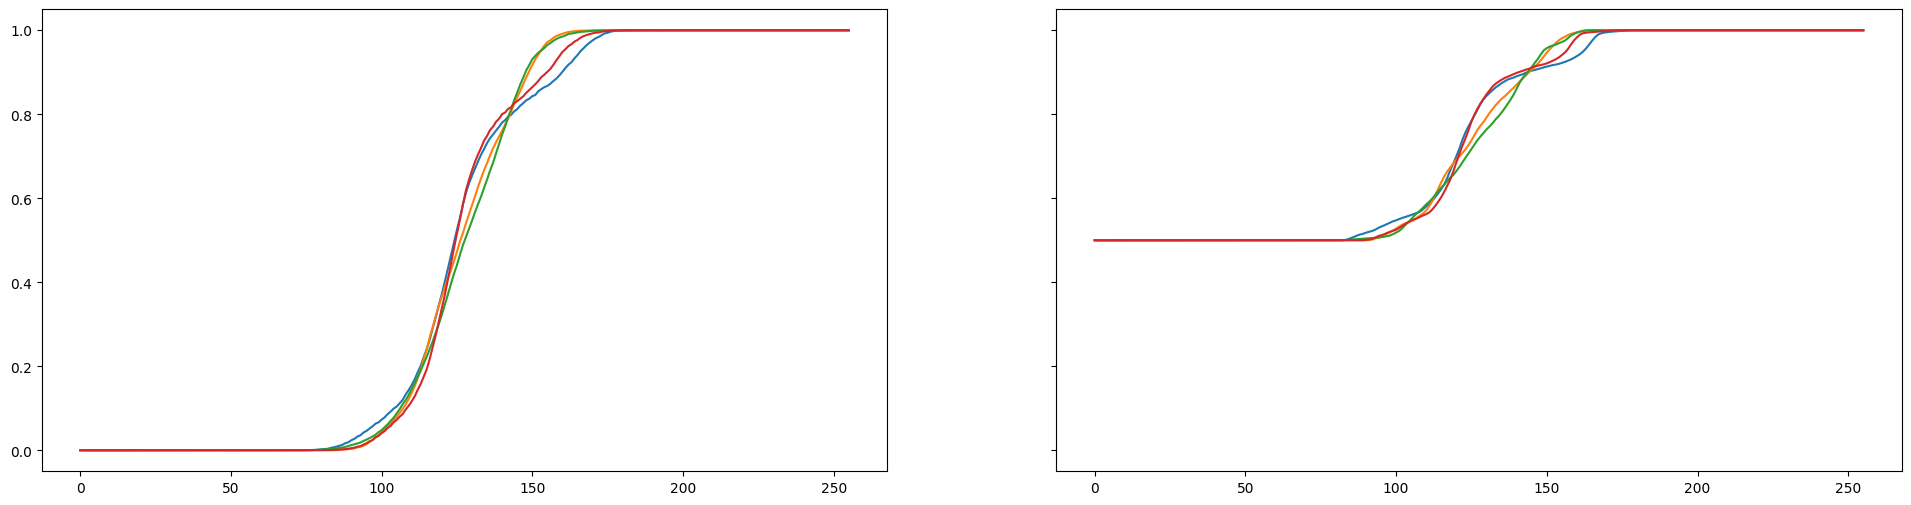

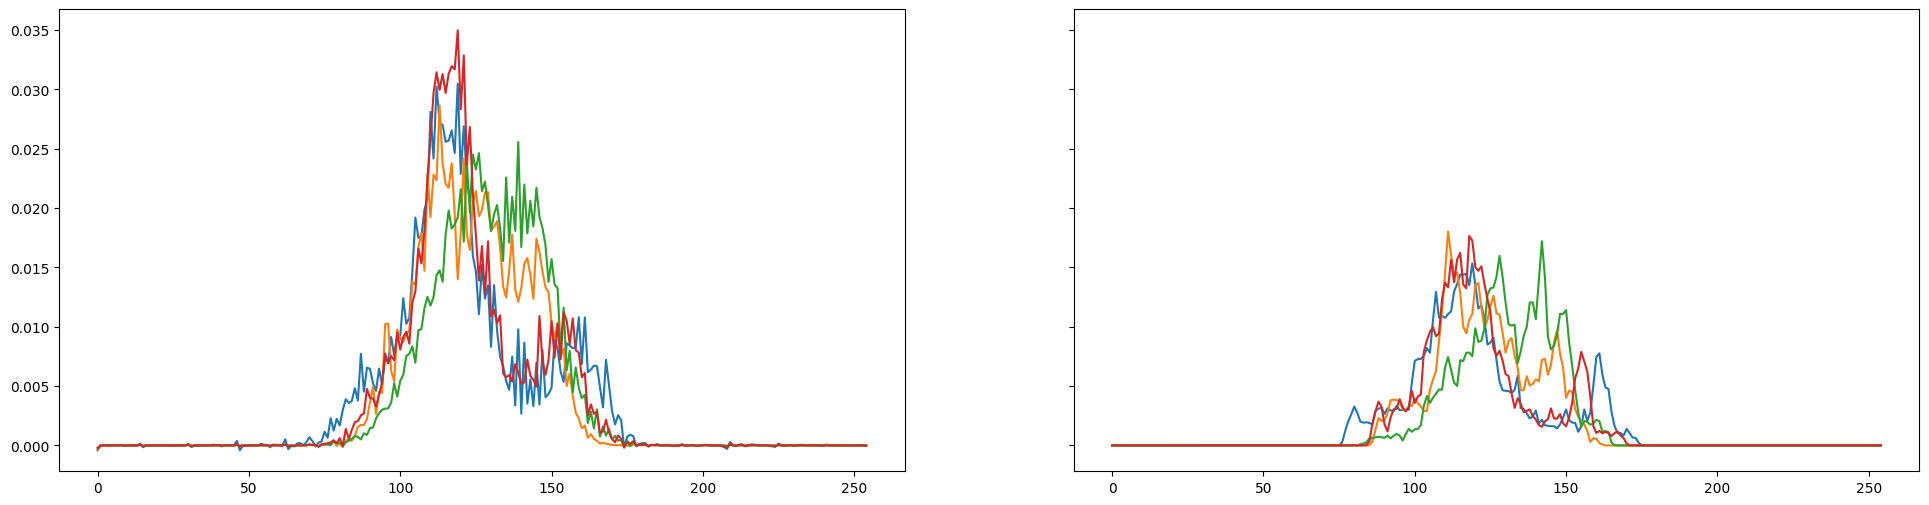

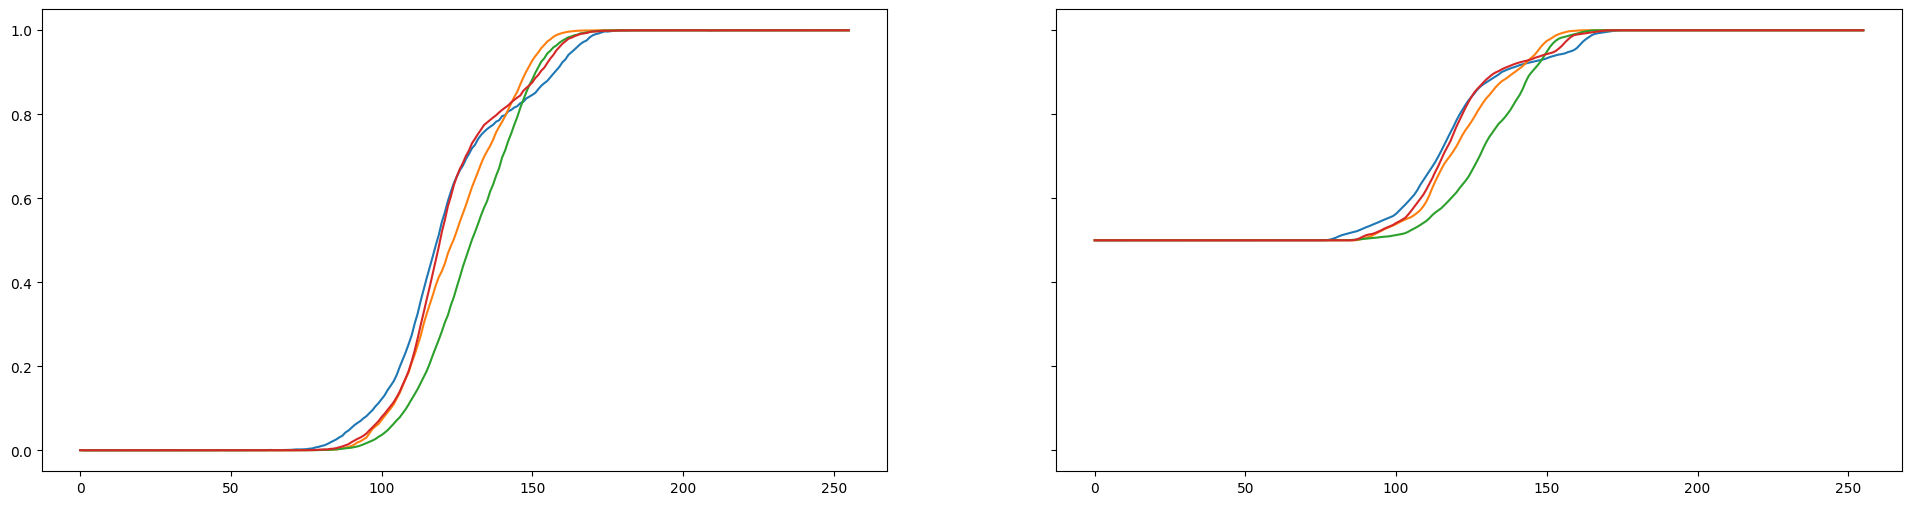

In [ ]:
K = 10
_, idxs = torch.topk(res["MMD-CD"],k=K,largest=False)
idxs = idxs.cpu()

FROM = 250
TO = 254

for idxy in range(K):
    idx = idxs[idxy]
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(24,6),sharey=True)
    ax = axes[0]
    for i in range(FROM,TO):
        ax.plot(recon_ect_diff[idx][i])

    ax = axes[1]
    for i in range(FROM,TO):
        ax.plot(ect_diff[idx][i])

    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(24,6),sharey=True)
    ax = axes[0]
    for i in range(FROM,TO):
        ax.plot(recon_ect[idx][i])

    ax = axes[1]
    for i in range(FROM,TO):
        ax.plot(ect[idx][i])


In [ ]:
torch.nn.functional.mse_loss(torch.tensor(recon_ect[idx]).unsqueeze(0),torch.tensor(ect[idx]).unsqueeze(0))

tensor(0.1153)

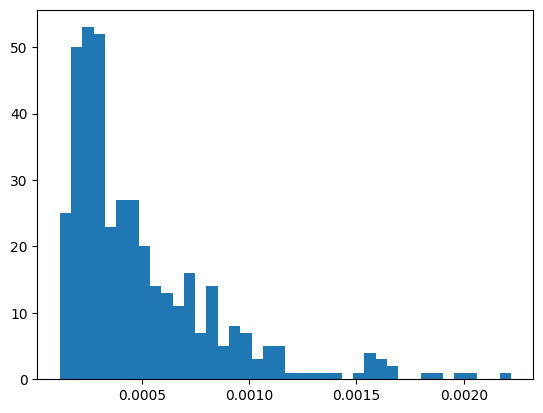

In [ ]:
from pprint import pprint

plt.hist(res["MMD-CD"].cpu().numpy(),bins=40);



In [ ]:
gen_ect = torch.load("./results/vae_airplane/sample_ect.pt").movedim(-1,-2).cpu().numpy()
gen_ect_diff = np.diff(gen_ect, n=1, axis=2)

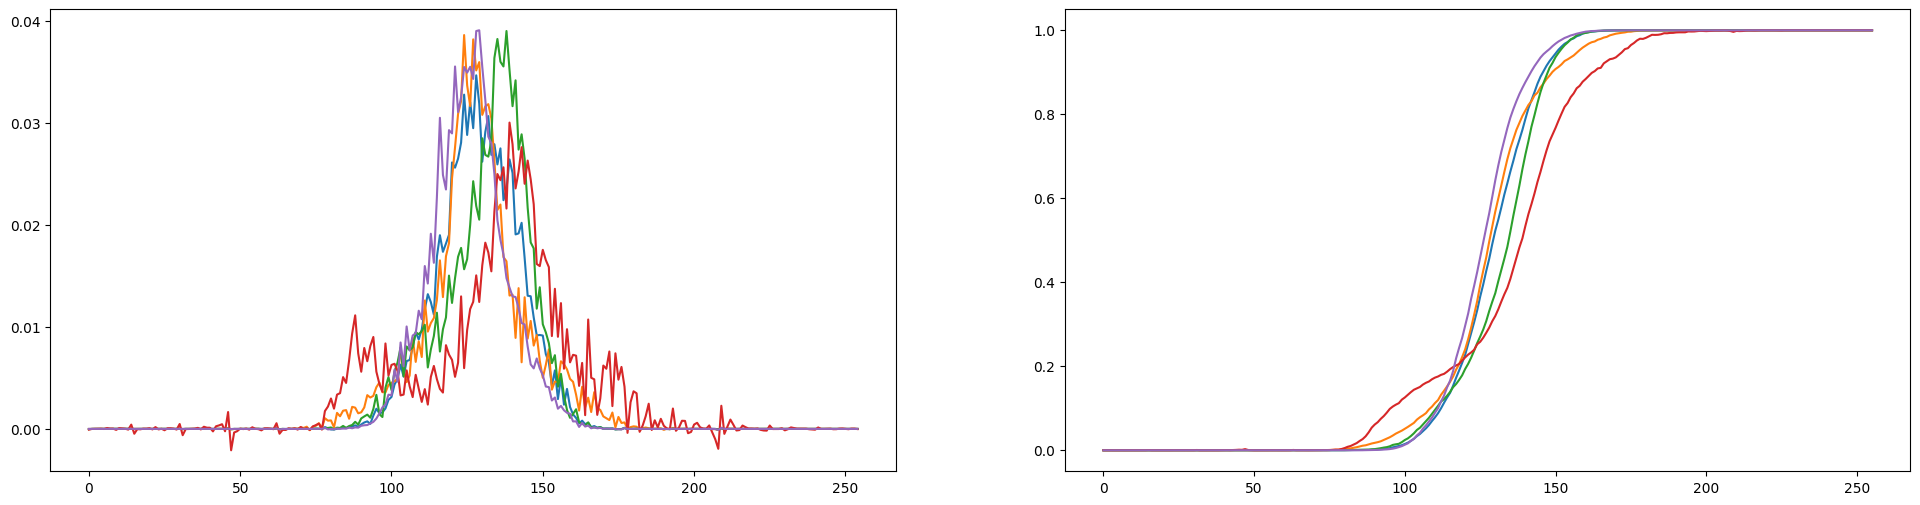

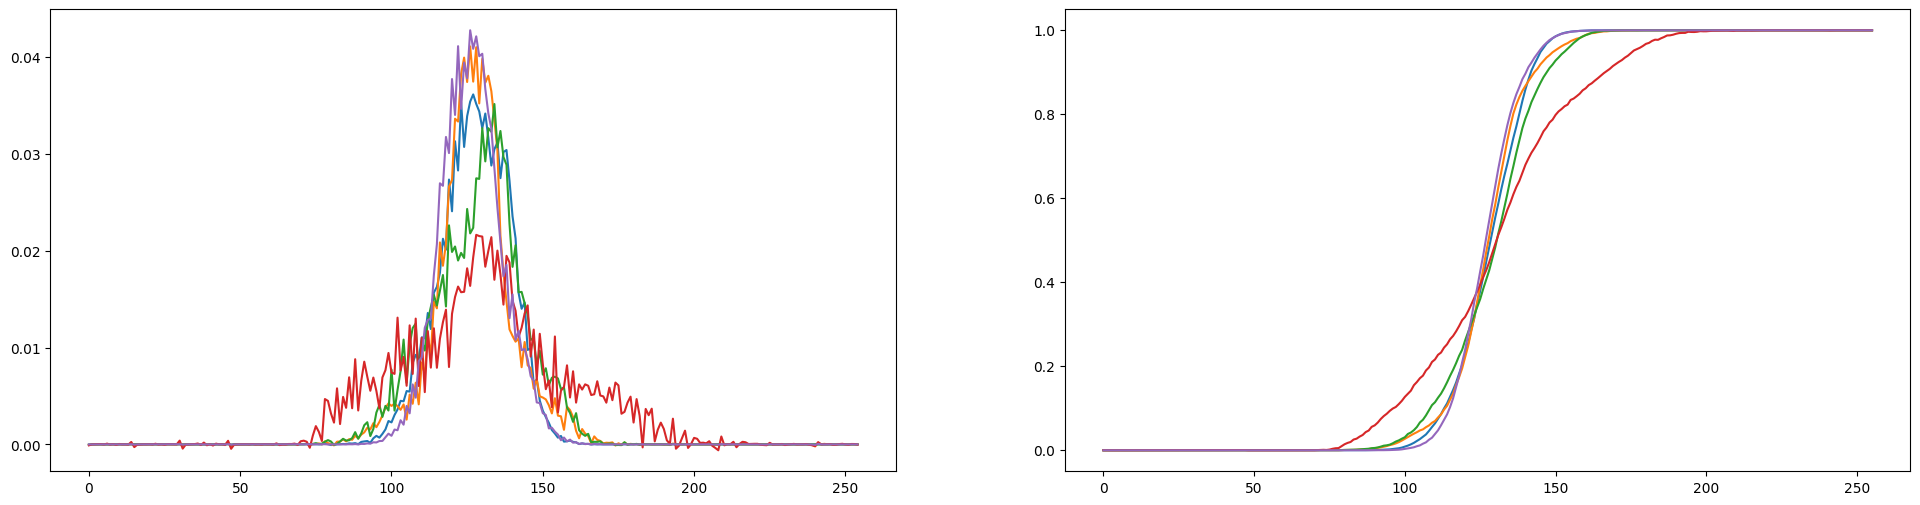

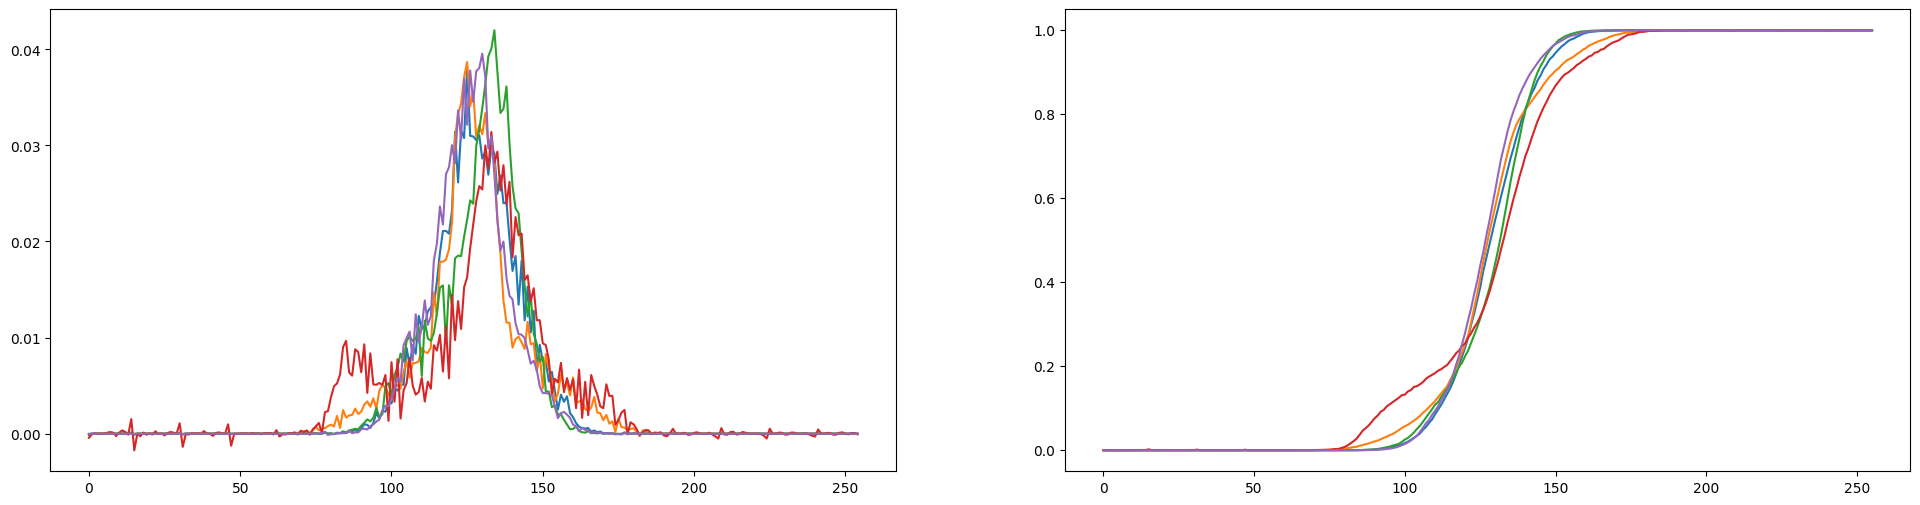

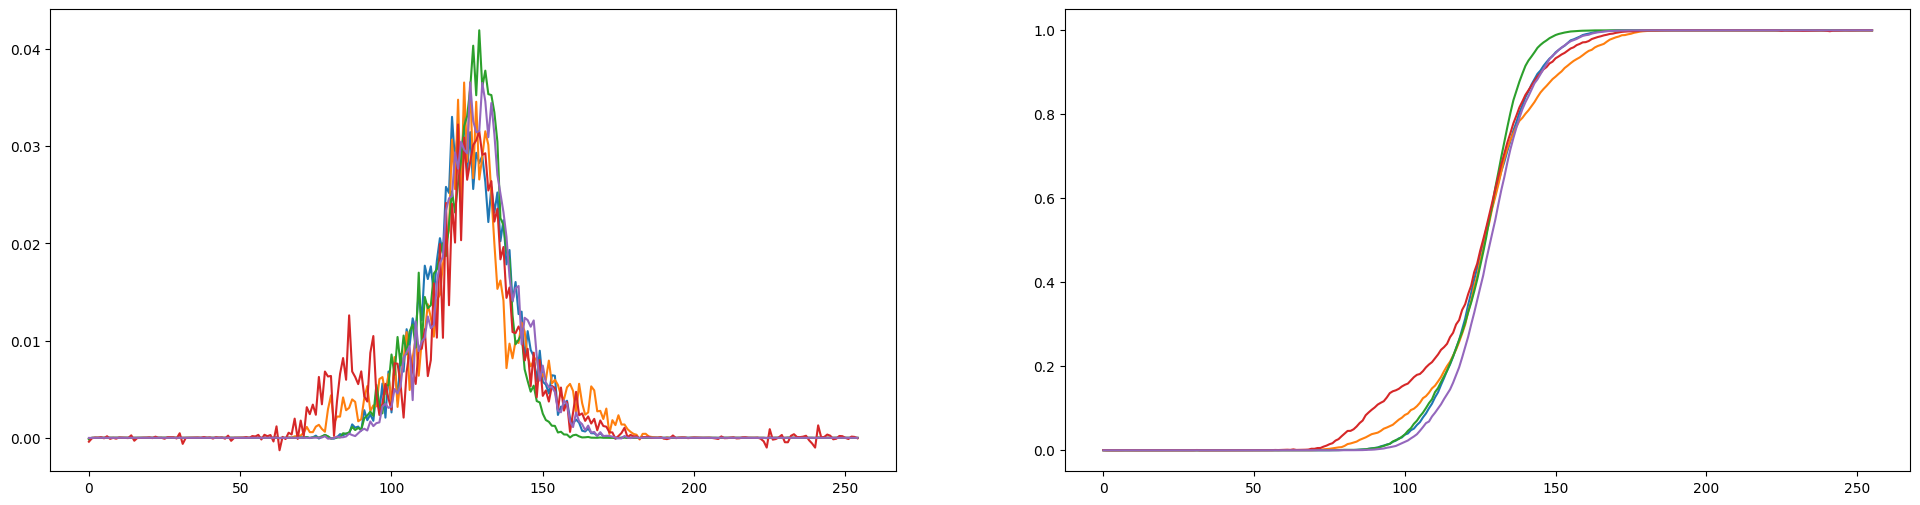

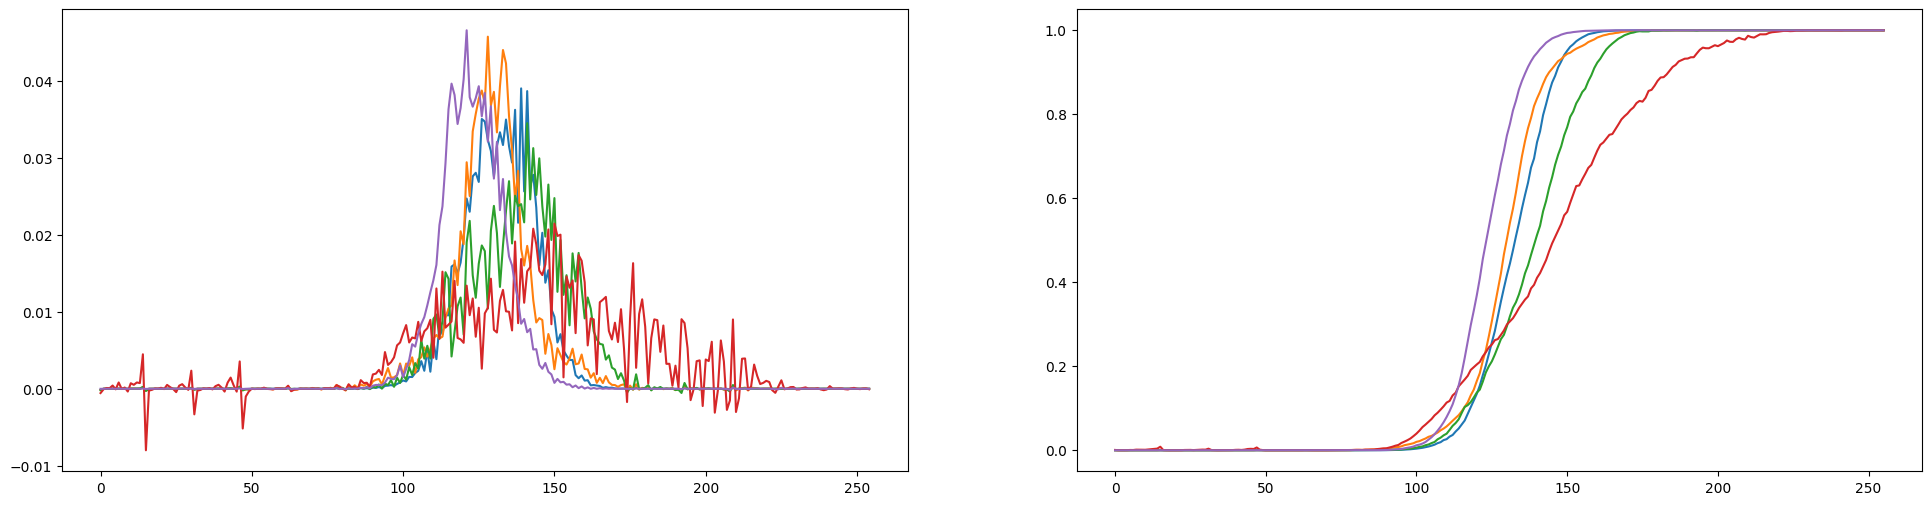

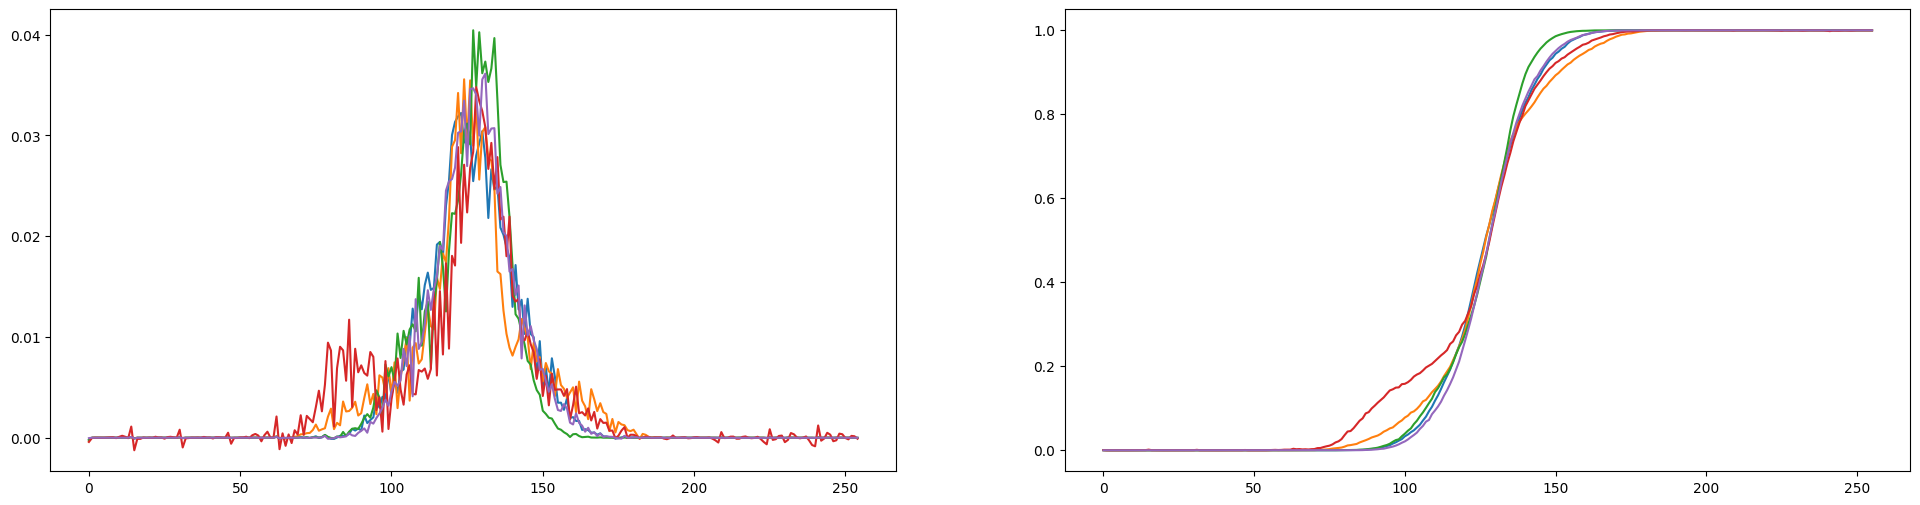

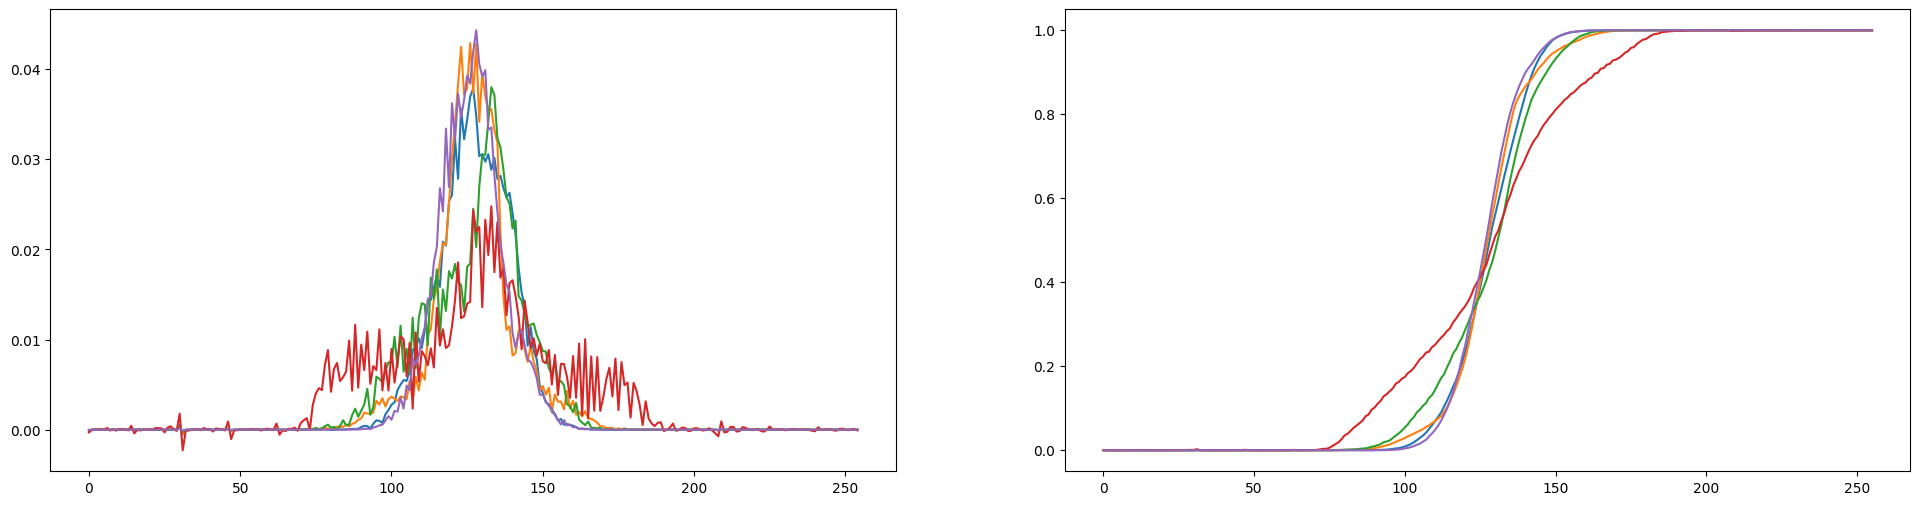

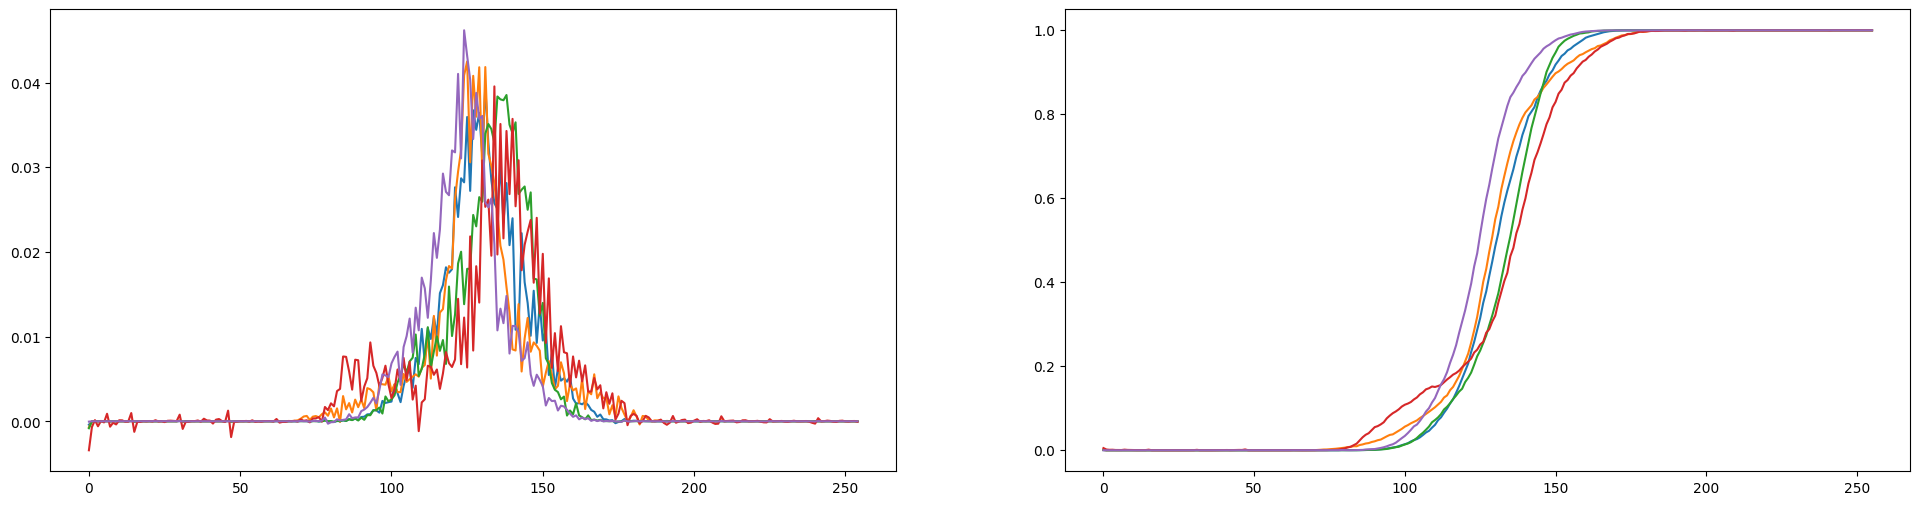

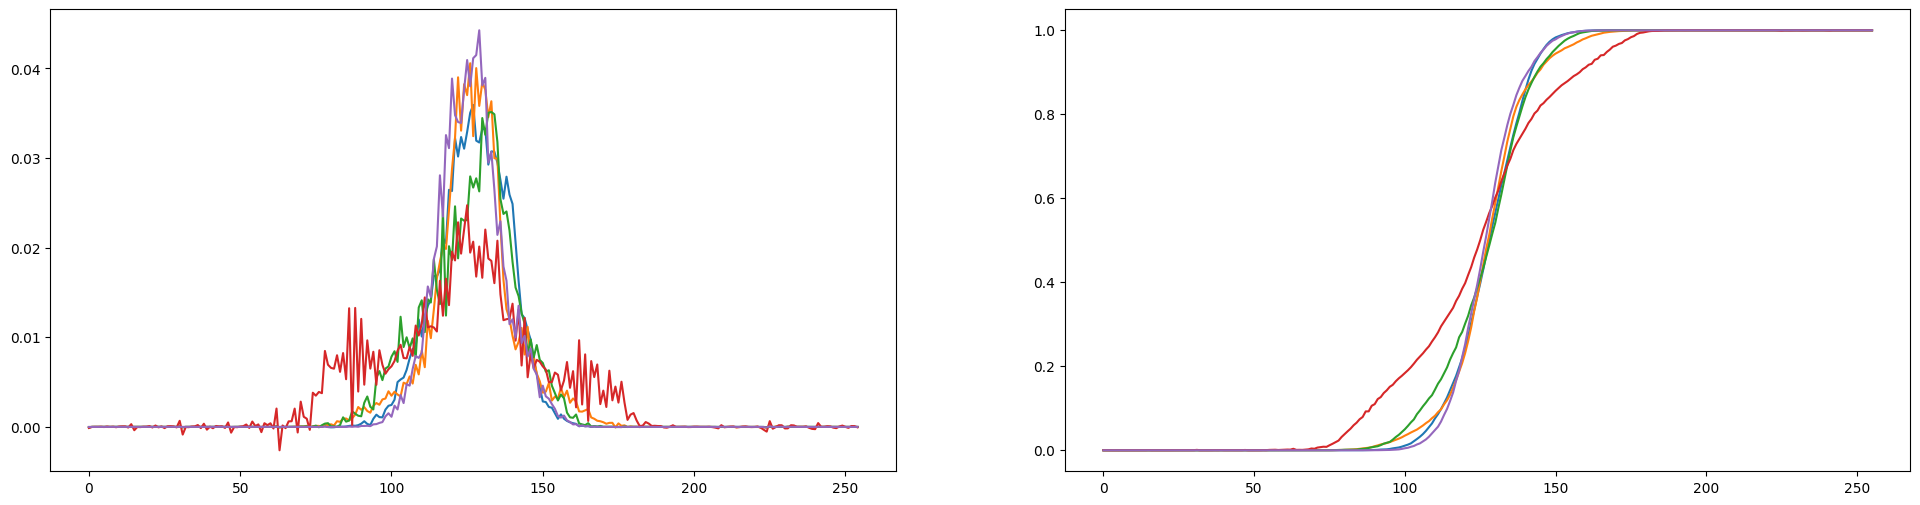

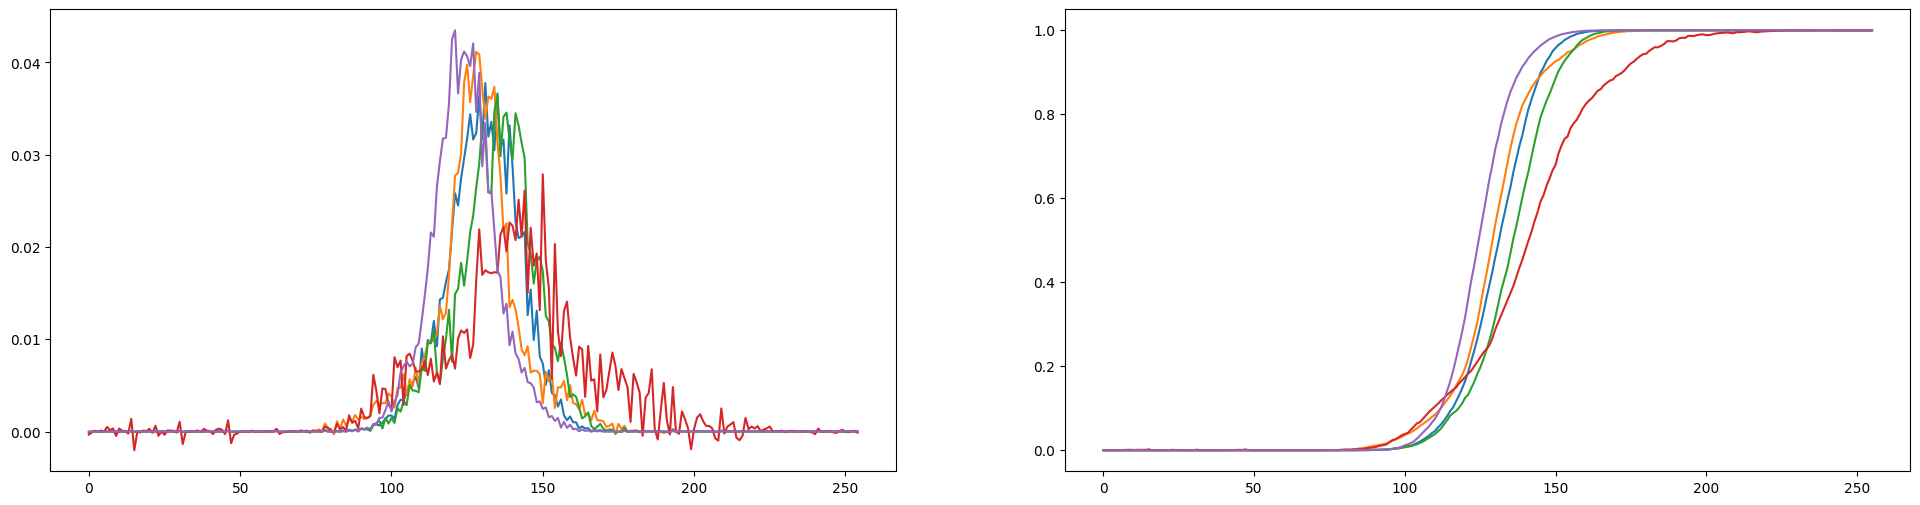

In [ ]:
FROM = 0
TO = 5

for idxy in range(10):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(24,6),sharey=False)
    ax = axes[0]
    for i in range(FROM,TO):
        ax.plot(gen_ect_diff[idxy][i])

    ax = axes[1]
    for i in range(FROM,TO):
        ax.plot(gen_ect[idxy][i])
